In [39]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

#  Problem 1

In [408]:
def snow_fund(times=10000):# use the Monte Carlo simutation to simulate the distribution of Snow Fund's return 
    means=[]
    stds=[]
    rs=[]
    for i in range(times):
        r_array=np.random.choice(a=[2, 22, -18], size=100, replace=True, p=[0.75, 0.125, 0.125])
        total_r=np.sum(r_array)
        rs.append(total_r)
#         means.append(np.mean(r_array))
#         stds.append(np.std(r_array))
        means.append(np.mean(rs))
        stds.append(np.std(rs))
    return rs,means,stds
rs,means,stds=snow_fund()

In [409]:
np.mean(rs),np.std(rs)

(199.926, 100.45394230193259)

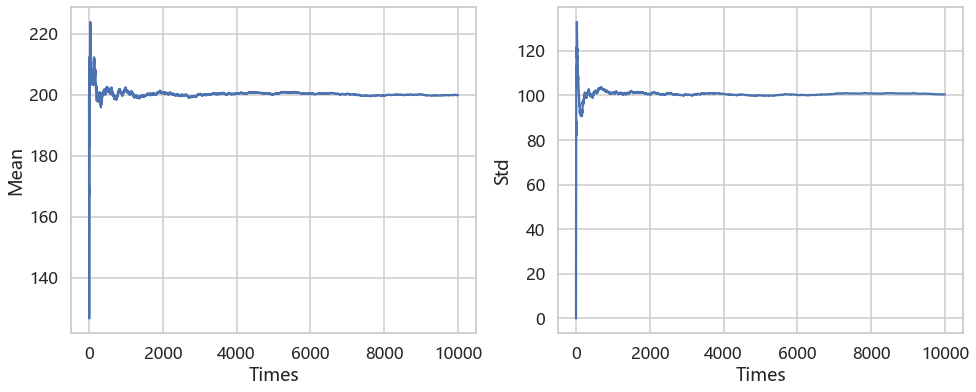

In [410]:
# plt.hist(np.reshape(rs,(-1,1)))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(means)
plt.ylabel('Mean')
plt.xlabel('Times')
plt.subplot(122)
plt.ylabel('Std')
plt.xlabel('Times')
plt.plot(stds)

Text(0.5, 0, 'Total return')

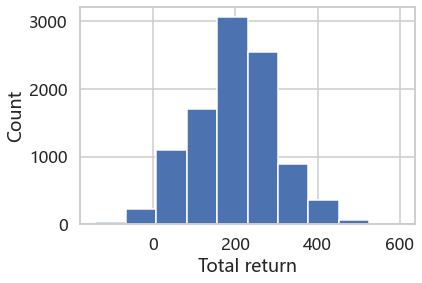

In [401]:
plt.hist(rs)
plt.ylabel('Count')
plt.xlabel('Total return')

In [365]:
def display_1():
    

100.0

#  HFRX

In [16]:
hfrx=pd.read_csv('hfrx_daily_index_data.csv')
hfrx

,07/22/2021,HFRX Absolute Return Index,HFRXAR,0.07%,1157.44
0,07/22/2021,HFRX ED: Merger Arbitrage Index,HFRXMA,-0.12%,1975.82
1,07/22/2021,HFRX ED: Special Situations Index,HFRXSS,0.05%,1469.42
2,07/22/2021,HFRX EH: Equity Market Neutral Index,HFRXEMN,-0.14%,932.09
3,07/22/2021,HFRX EH: Fundamental Growth Index,HFRXEHG,0.40%,2003.71
4,07/22/2021,HFRX EH: Fundamental Value Index,HFRXEHV,0.11%,1435.19
...,...,...,...,...,...
131267,03/31/2003,HFRX Macro/CTA EUR Index,HFRXME,0%,1000.00
131268,03/31/2003,HFRX Macro/CTA Index,HFRXM,0%,1000.00
131269,03/31/2003,HFRX Relative Value Arbitrage EUR Index,HFRXRVAE,0%,1000.00
131270,03/31/2003,HFRX Relative Value Arbitrage Index,HFRXRVA,0%,1000.00


In [18]:
hfrx.columns=['date','name','index','change','size']
hfrx

,date,name,index,change,size
0,07/22/2021,HFRX ED: Merger Arbitrage Index,HFRXMA,-0.12%,1975.82
1,07/22/2021,HFRX ED: Special Situations Index,HFRXSS,0.05%,1469.42
2,07/22/2021,HFRX EH: Equity Market Neutral Index,HFRXEMN,-0.14%,932.09
3,07/22/2021,HFRX EH: Fundamental Growth Index,HFRXEHG,0.40%,2003.71
4,07/22/2021,HFRX EH: Fundamental Value Index,HFRXEHV,0.11%,1435.19
...,...,...,...,...,...
131267,03/31/2003,HFRX Macro/CTA EUR Index,HFRXME,0%,1000.00
131268,03/31/2003,HFRX Macro/CTA Index,HFRXM,0%,1000.00
131269,03/31/2003,HFRX Relative Value Arbitrage EUR Index,HFRXRVAE,0%,1000.00
131270,03/31/2003,HFRX Relative Value Arbitrage Index,HFRXRVA,0%,1000.00


In [84]:
hfrx_Global=hfrx[hfrx['name']=='HFRX Global Hedge Fund Index']
hfrx_Global['date']=pd.to_datetime(hfrx_Global.date)
hfrx_Global.sort_values(by='date',ascending=True,inplace=True)
hfrx_Global.to_csv('Global_HFI.csv',index=False)
hfrx_Global

,date,name,index,change,size
131266,2003-03-31,HFRX Global Hedge Fund Index,HFRXGL,0%,1000.00
131251,2003-04-01,HFRX Global Hedge Fund Index,HFRXGL,0.20%,1002.00
131235,2003-04-02,HFRX Global Hedge Fund Index,HFRXGL,0.22%,1004.23
131219,2003-04-03,HFRX Global Hedge Fund Index,HFRXGL,0.07%,1004.97
131203,2003-04-04,HFRX Global Hedge Fund Index,HFRXGL,0%,1004.96
...,...,...,...,...,...
148,2021-07-16,HFRX Global Hedge Fund Index,HFRXGL,-0.13%,1426.85
116,2021-07-19,HFRX Global Hedge Fund Index,HFRXGL,-0.57%,1418.72
84,2021-07-20,HFRX Global Hedge Fund Index,HFRXGL,0.14%,1420.70
52,2021-07-21,HFRX Global Hedge Fund Index,HFRXGL,0.33%,1425.37


In [83]:
hfrx_Equity_Hedge=hfrx[hfrx['name']=='HFRX Equity Hedge Index']
hfrx_Equity_Hedge['date']=pd.to_datetime(hfrx_Equity_Hedge.date)
hfrx_Equity_Hedge.sort_values(by='date',ascending=True,inplace=True)
hfrx_Equity_Hedge.to_csv('Equity_Hedge.csv',index=False)
hfrx_Equity_Hedge

,date,name,index,change,size
131262,2003-03-31,HFRX Equity Hedge Index,HFRXEH,0%,1000.00
131246,2003-04-01,HFRX Equity Hedge Index,HFRXEH,0.38%,1003.76
131230,2003-04-02,HFRX Equity Hedge Index,HFRXEH,0.45%,1008.31
131214,2003-04-03,HFRX Equity Hedge Index,HFRXEH,0.14%,1009.74
131198,2003-04-04,HFRX Equity Hedge Index,HFRXEH,-0.15%,1008.19
...,...,...,...,...,...
140,2021-07-16,HFRX Equity Hedge Index,HFRXEH,-0.29%,1433.95
108,2021-07-19,HFRX Equity Hedge Index,HFRXEH,-0.93%,1420.68
76,2021-07-20,HFRX Equity Hedge Index,HFRXEH,0.58%,1428.96
44,2021-07-21,HFRX Equity Hedge Index,HFRXEH,0.59%,1437.32


In [82]:
hfrx_ED=hfrx[hfrx['name']=='HFRX Event Driven Index']
hfrx_ED['date']=pd.to_datetime(hfrx_ED.date)
hfrx_ED.sort_values(by='date',ascending=True,inplace=True)
hfrx_ED.to_csv('Event_Driven.csv',index=False)
hfrx_ED

,date,name,index,change,size
131264,2003-03-31,HFRX Event Driven Index,HFRXED,0%,1000.00
131248,2003-04-01,HFRX Event Driven Index,HFRXED,0.05%,1000.45
131232,2003-04-02,HFRX Event Driven Index,HFRXED,0.26%,1003.03
131216,2003-04-03,HFRX Event Driven Index,HFRXED,0.18%,1004.87
131200,2003-04-04,HFRX Event Driven Index,HFRXED,0.13%,1006.13
...,...,...,...,...,...
142,2021-07-16,HFRX Event Driven Index,HFRXED,0%,1813.60
110,2021-07-19,HFRX Event Driven Index,HFRXED,-0.32%,1807.82
78,2021-07-20,HFRX Event Driven Index,HFRXED,-0.09%,1806.21
46,2021-07-21,HFRX Event Driven Index,HFRXED,0.16%,1809.01


In [81]:
hfrx_Macro=hfrx[hfrx['name']=='HFRX Macro/CTA Index']
hfrx_Macro['date']=pd.to_datetime(hfrx_Macro.date)
hfrx_Macro.sort_values(by='date',ascending=True,inplace=True)
hfrx_Macro.to_csv('Macro_CTA.csv',index=False)
hfrx_Macro

,date,name,index,change,size
131268,2003-03-31,HFRX Macro/CTA Index,HFRXM,0%,1000.00
131253,2003-04-01,HFRX Macro/CTA Index,HFRXM,0.15%,1001.51
131237,2003-04-02,HFRX Macro/CTA Index,HFRXM,0.10%,1002.50
131221,2003-04-03,HFRX Macro/CTA Index,HFRXM,-0.35%,999.00
131205,2003-04-04,HFRX Macro/CTA Index,HFRXM,0.02%,999.18
...,...,...,...,...,...
151,2021-07-16,HFRX Macro/CTA Index,HFRXM,-0.22%,1240.50
119,2021-07-19,HFRX Macro/CTA Index,HFRXM,-0.98%,1228.31
87,2021-07-20,HFRX Macro/CTA Index,HFRXM,-0.06%,1227.52
55,2021-07-21,HFRX Macro/CTA Index,HFRXM,0.53%,1234.08


In [80]:
hfrx_RV=hfrx[hfrx['name']=='HFRX Relative Value Arbitrage Index']
hfrx_RV['date']=pd.to_datetime(hfrx_RV.date)
hfrx_RV.sort_values(by='date',ascending=True,inplace=True)
hfrx_RV.to_csv('Relative_Value.csv',index=False)
hfrx_RV

,date,name,index,change,size
131270,2003-03-31,HFRX Relative Value Arbitrage Index,HFRXRVA,0%,1000.00
131255,2003-04-01,HFRX Relative Value Arbitrage Index,HFRXRVA,0.07%,1000.73
131239,2003-04-02,HFRX Relative Value Arbitrage Index,HFRXRVA,0.01%,1000.79
131223,2003-04-03,HFRX Relative Value Arbitrage Index,HFRXRVA,-0.05%,1000.32
131207,2003-04-04,HFRX Relative Value Arbitrage Index,HFRXRVA,0.13%,1001.62
...,...,...,...,...,...
156,2021-07-16,HFRX Relative Value Arbitrage Index,HFRXRVA,-0.02%,1359.53
124,2021-07-19,HFRX Relative Value Arbitrage Index,HFRXRVA,-0.16%,1357.36
92,2021-07-20,HFRX Relative Value Arbitrage Index,HFRXRVA,-0.01%,1357.27
60,2021-07-21,HFRX Relative Value Arbitrage Index,HFRXRVA,0.08%,1358.39


In [79]:
hfrx_FI=hfrx[hfrx['name']=='HFRX RV: FI-Convertible Arbitrage Index']
hfrx_FI['date']=pd.to_datetime(hfrx_FI.date)
hfrx_FI.sort_values(by='date',ascending=True,inplace=True)
hfrx_FI.to_csv('RV_FI_Convertible_Arbitrage.csv',index=False)
hfrx_FI

,date,name,index,change,size
131271,2003-03-31,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0%,1000.00
131256,2003-04-01,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.05%,1000.54
131240,2003-04-02,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.07%,1001.21
131224,2003-04-03,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.19%,1003.15
131208,2003-04-04,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.18%,1005.00
...,...,...,...,...,...
157,2021-07-16,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,-0.12%,992.75
125,2021-07-19,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,-0.31%,989.62
93,2021-07-20,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.17%,991.34
61,2021-07-21,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.23%,993.64


In [78]:
hfrx_FI['date']=pd.to_datetime(hfrx_FI.date)
hfrx_FI.sort_values(by='date',ascending=True)

,date,name,index,change,size
131271,2003-03-31,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0%,1000.00
131256,2003-04-01,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.05%,1000.54
131240,2003-04-02,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.07%,1001.21
131224,2003-04-03,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.19%,1003.15
131208,2003-04-04,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.18%,1005.00
...,...,...,...,...,...
157,2021-07-16,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,-0.12%,992.75
125,2021-07-19,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,-0.31%,989.62
93,2021-07-20,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.17%,991.34
61,2021-07-21,HFRX RV: FI-Convertible Arbitrage Index,HFRXCA,0.23%,993.64


# 获取 SP，HSI，CS

In [7]:
import tushare as ts

In [6]:
pip install tushare

You should consider upgrading via the 'D:\anaconda\result_product\python.exe -m pip install --upgrade pip' command.


In [8]:
#设置token
ts.set_token('3f838e4e9b13f9be758c8d55a3eb7e37365be40173017a6e073d51a4')
#初始化pro接口
pro = ts.pro_api()

In [11]:
#获取标普500
df_SPX = pro.index_global(ts_code='SPX', start_date='20030101', end_date='20210725')
df_SPX

,ts_code,trade_date,open,close,high,low,pre_close,change,pct_chg,swing,vol
0,SPX,20210723,4381.20,4411.79,4415.18,4381.20,4367.48,44.31,1.01,0.78,1777379.0
1,SPX,20210722,4361.27,4367.48,4369.87,4350.06,4358.69,8.79,0.20,0.45,1843552.0
2,SPX,20210721,4331.13,4358.69,4359.70,4331.13,4323.06,35.63,0.82,0.66,2136774.0
3,SPX,20210720,4265.11,4323.06,4336.84,4262.05,4258.49,64.57,1.52,1.76,2426517.0
4,SPX,20210719,4296.40,4258.49,4296.40,4233.13,4327.16,-68.67,-1.59,1.46,2840163.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,SPX,20050824,1217.40,1209.59,1224.15,1209.37,1217.57,-7.99,-0.66,1.21,NaN
3996,SPX,20050823,1221.54,1217.57,1223.04,1214.44,1221.73,-4.15,-0.34,0.70,NaN
3997,SPX,20050822,1219.54,1221.73,1228.96,1216.47,1219.71,2.01,0.17,1.02,NaN
3998,SPX,20050819,1219.52,1219.71,1225.08,1219.02,1219.02,0.69,0.06,0.50,NaN


In [12]:
df_SPX.to_csv('SPX_2005-2021.csv',index=False)

In [10]:
#获取恒生指数
df_HSI = pro.index_global(ts_code='HSI', start_date='20030101', end_date='20210725')
df_HSI

,ts_code,trade_date,open,close,high,low,pre_close,change,pct_chg,swing,vol
0,HSI,20210723,27740.95,27321.98,27740.95,27222.04,27723.84,-401.86,-1.45,1.87,1182745.00
1,HSI,20210722,27464.28,27723.84,27759.71,27455.43,27224.58,499.26,1.83,1.12,1807200.00
2,HSI,20210721,27339.22,27224.58,27371.50,26971.03,27259.25,-34.67,-0.13,1.47,1672533.00
3,HSI,20210720,27395.83,27259.25,27532.86,27121.49,27489.78,-230.53,-0.84,1.50,2263381.00
4,HSI,20210719,27786.54,27489.78,27786.54,27397.29,28004.68,-514.90,-1.84,1.39,1874176.00
...,...,...,...,...,...,...,...,...,...,...,...
3995,HSI,20050510,14097.19,14018.38,14112.61,13991.19,14085.09,-66.71,-0.47,0.86,235428.88
3996,HSI,20050509,14068.26,14085.09,14106.53,14006.85,14033.96,51.13,0.36,0.71,283408.19
3997,HSI,20050506,14041.29,14033.96,14095.85,14004.07,14061.70,-27.74,-0.20,0.65,272557.75
3998,HSI,20050505,14056.93,14061.70,14110.29,14021.93,13945.05,116.65,0.84,0.63,313172.19


In [13]:
df_SPX.to_csv('HSI_2005-2021.csv',index=False)

In [53]:
#获取招商银行（香港上市）
df = pro.hk_basic()
#获取全部退市股票基础信息
#ts_code=03968.HK
df_zhaoshang=pro.hk_basic(ts_code='03968.HK')
df_zhaoshang

Exception: 抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [59]:
import baostock as bs
def baostock(
        code="sh.600000",
        fields="date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
        start_date='2003-01-01',
        end_date='2021-7-26',
        frequency="d",
        adjustflag="3",
        download=False,
        location="D:\\history_A_stock_k_data.csv"):
    #### 登陆系统 ####
    lg = bs.login()
    # 显示登陆返回信息
    print('login respond error_code:' + lg.error_code)
    print('login respond  error_msg:' + lg.error_msg)

    #### 获取沪深A股历史K线数据 ####
    # 详细指标参数，参见“历史行情指标参数”章节
    rs = bs.query_history_k_data(code,
                                 fields,
                                 start_date,
                                 end_date,
                                 frequency,
                                 adjustflag)
    print('query_history_k_data respond error_code:' + rs.error_code)
    print('query_history_k_data respond  error_msg:' + rs.error_msg)

    #### 打印结果集 ####
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    print(result)
    if download:
        #### 结果集输出到csv文件 ####
        result.to_csv(location, index=False)
        print('---Downloaded Successfully!---')
    else:
        print('---Download:Choose not to download.---')

    #### 登出系统 ####
    bs.logout()

In [60]:
#茅台
baostock(code='sz.000651',download=True,location='D:/A1Python/Others//格力.csv')

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success
            date       code     open     high      low    close preclose  \
0     2003-01-02  sz.000651   7.9900   8.1000   7.9000   7.9100   8.3400   
1     2003-01-03  sz.000651   7.9100   8.0500   7.9000   7.9700   7.9100   
2     2003-01-06  sz.000651   7.9200   8.2500   7.9200   8.1600   7.9700   
3     2003-01-07  sz.000651   8.1900   8.2200   8.1000   8.1600   8.1600   
4     2003-01-08  sz.000651   8.1600   8.2900   8.1200   8.2600   8.1600   
...          ...        ...      ...      ...      ...      ...      ...   
4503  2021-07-19  sz.000651  50.3000  51.7300  50.0000  51.4800  49.9900   
4504  2021-07-20  sz.000651  51.3500  51.9400  50.7000  51.2000  51.4800   
4505  2021-07-21  sz.000651  51.2000  51.4900  49.9000  49.9500  51.2000   
4506  2021-07-22  sz.000651  49.8000  50.4500  49.5000  49.9500  49.9500   

In [35]:
sp=pd.read_csv('HistoricalPrices.csv')
sp.tail(20)

,Date,Open,High,Low,Close
4652,01/30/03,844.61,865.20,843.93,844.61
4653,01/29/03,864.36,868.56,846.04,864.36
4654,01/28/03,858.54,860.52,847.48,858.54
4655,01/27/03,847.48,863.92,844.31,847.48
4656,01/24/03,861.40,887.34,859.82,861.40
4657,01/23/03,887.34,890.14,876.96,887.34
4658,01/22/03,878.36,889.47,877.65,878.36
4659,01/21/03,887.62,906.01,887.62,887.62
4660,01/17/03,901.78,914.60,899.07,901.78
4661,01/16/03,914.60,925.97,911.99,914.60


In [36]:
sp.Date

0       07/23/21
1       07/22/21
2       07/21/21
3       07/20/21
4       07/19/21
          ...   
4667    01/08/03
4668    01/07/03
4669    01/06/03
4670    01/03/03
4671    01/02/03
Name: Date, Length: 4672, dtype: object

In [38]:
HS_345=pd.read_csv('HSI.csv')
HS_345

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003/1/1,NaN,NaN,NaN,NaN,NaN,NaN
1,2003/1/2,9333.639648,9378.349609,9294.530273,9365.519531,9365.519531,126907400.0
2,2003/1/3,9523.250000,9585.660156,9520.849609,9583.849609,9583.849609,291454400.0
3,2003/1/6,9605.089844,9683.860352,9560.820313,9665.959961,9665.959961,234912800.0
4,2003/1/7,9710.790039,9710.790039,9592.290039,9652.400391,9652.400391,267021800.0
...,...,...,...,...,...,...,...
765,2005/12/22,15251.099610,15252.450200,15170.919920,15182.530270,15182.530270,243697200.0
766,2005/12/23,15208.839840,15226.030270,15182.639650,15183.580080,15183.580080,164157400.0
767,2005/12/28,15076.940430,15173.480470,15049.410160,15101.540040,15101.540040,215911000.0
768,2005/12/29,15146.549810,15151.320310,15028.280270,15045.589840,15045.589840,266347000.0


In [41]:
HS_345['Date']=pd.to_datetime(HS_345['Date'])
HS_345.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       770 non-null    datetime64[ns]
 1   Open       744 non-null    float64       
 2   High       744 non-null    float64       
 3   Low        744 non-null    float64       
 4   Close      744 non-null    float64       
 5   Adj Close  744 non-null    float64       
 6   Volume     744 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 42.2 KB


In [45]:
HS_345.sort_values(by='Date',ascending=False,inplace=True)
HS_345

,Date,Open,High,Low,Close,Adj Close,Volume
769,2005-12-30,14959.419920,14972.200200,14811.639650,14876.429690,14876.429690,448872000.0
768,2005-12-29,15146.549810,15151.320310,15028.280270,15045.589840,15045.589840,266347000.0
767,2005-12-28,15076.940430,15173.480470,15049.410160,15101.540040,15101.540040,215911000.0
766,2005-12-23,15208.839840,15226.030270,15182.639650,15183.580080,15183.580080,164157400.0
765,2005-12-22,15251.099610,15252.450200,15170.919920,15182.530270,15182.530270,243697200.0
...,...,...,...,...,...,...,...
4,2003-01-07,9710.790039,9710.790039,9592.290039,9652.400391,9652.400391,267021800.0
3,2003-01-06,9605.089844,9683.860352,9560.820313,9665.959961,9665.959961,234912800.0
2,2003-01-03,9523.250000,9585.660156,9520.849609,9583.849609,9583.849609,291454400.0
1,2003-01-02,9333.639648,9378.349609,9294.530273,9365.519531,9365.519531,126907400.0


In [47]:
df_HSI['Date']=pd.to_datetime(df_HSI.trade_date)
df_HSI

,ts_code,trade_date,open,close,high,low,pre_close,change,pct_chg,swing,vol,Date
0,HSI,20210723,27740.95,27321.98,27740.95,27222.04,27723.84,-401.86,-1.45,1.87,1182745.00,2021-07-23
1,HSI,20210722,27464.28,27723.84,27759.71,27455.43,27224.58,499.26,1.83,1.12,1807200.00,2021-07-22
2,HSI,20210721,27339.22,27224.58,27371.50,26971.03,27259.25,-34.67,-0.13,1.47,1672533.00,2021-07-21
3,HSI,20210720,27395.83,27259.25,27532.86,27121.49,27489.78,-230.53,-0.84,1.50,2263381.00,2021-07-20
4,HSI,20210719,27786.54,27489.78,27786.54,27397.29,28004.68,-514.90,-1.84,1.39,1874176.00,2021-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,HSI,20050510,14097.19,14018.38,14112.61,13991.19,14085.09,-66.71,-0.47,0.86,235428.88,2005-05-10
3996,HSI,20050509,14068.26,14085.09,14106.53,14006.85,14033.96,51.13,0.36,0.71,283408.19,2005-05-09
3997,HSI,20050506,14041.29,14033.96,14095.85,14004.07,14061.70,-27.74,-0.20,0.65,272557.75,2005-05-06
3998,HSI,20050505,14056.93,14061.70,14110.29,14021.93,13945.05,116.65,0.84,0.63,313172.19,2005-05-05


# 三大指数

In [61]:
df_indices=pd.read_excel('三大指数.xlsx')
df_indices

,时间,恒生指数,美国:标准普尔500指数,沪深300指数,date,close
0,2003-01-02,9365.52,909.03,1074.9840,2003-01-02,7.91
1,2003-01-03,9583.85,908.59,1073.5240,2003-01-03,7.97
2,2003-01-06,9665.96,929.01,1084.8840,2003-01-06,8.16
3,2003-01-07,9652.40,922.93,1081.6220,2003-01-07,8.16
4,2003-01-08,9688.21,909.93,1111.8320,2003-01-08,8.26
...,...,...,...,...,...,...
4814,2021-07-14,27787.46,4374.30,5083.0849,NaT,NaN
4815,2021-07-15,27996.27,4360.03,5151.4626,NaT,NaN
4816,2021-07-16,28004.68,4327.16,5094.7727,NaT,NaN
4817,2021-07-19,27489.78,4258.49,5113.4945,NaT,NaN


In [62]:
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   时间            4819 non-null   datetime64[ns]
 1   恒生指数          4576 non-null   float64       
 2   美国:标准普尔500指数  4669 non-null   float64       
 3   沪深300指数       4505 non-null   float64       
 4   date          4508 non-null   datetime64[ns]
 5   close         4508 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 226.0 KB


In [64]:
gree=df_indices.iloc[:,[4,5]]
gree

,date,close
0,2003-01-02,7.91
1,2003-01-03,7.97
2,2003-01-06,8.16
3,2003-01-07,8.16
4,2003-01-08,8.26
...,...,...
4814,NaT,NaN
4815,NaT,NaN
4816,NaT,NaN
4817,NaT,NaN


In [66]:
indices_2=df_indices.iloc[:,:3]
indices_2

,时间,恒生指数,美国:标准普尔500指数
0,2003-01-02,9365.52,909.03
1,2003-01-03,9583.85,908.59
2,2003-01-06,9665.96,929.01
3,2003-01-07,9652.40,922.93
4,2003-01-08,9688.21,909.93
...,...,...,...
4814,2021-07-14,27787.46,4374.30
4815,2021-07-15,27996.27,4360.03
4816,2021-07-16,28004.68,4327.16
4817,2021-07-19,27489.78,4258.49


In [72]:
pd.merge(indices_2,gree,left_on='时间',right_on='date').to_csv('SP恒生Gree.csv',index=False)

In [76]:
SHG=pd.read_csv('SP恒生Gree.csv').drop('date',axis=1)
SHG

,时间,HS,SP,Gree
0,2003/1/2,9365.52,909.03,7.91
1,2003/1/3,9583.85,908.59,7.97
2,2003/1/6,9665.96,929.01,8.16
3,2003/1/7,9652.40,922.93,8.16
4,2003/1/8,9688.21,909.93,8.26
...,...,...,...,...
4500,2021/7/14,27787.46,4374.30,49.60
4501,2021/7/15,27996.27,4360.03,49.50
4502,2021/7/16,28004.68,4327.16,49.99
4503,2021/7/19,27489.78,4258.49,51.48


#  All

In [304]:
df_all_price=pd.read_excel('All.xlsx')
df_all_price

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree
0,2003-03-31,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,848.18,8634.45,8.98
1,2003-04-01,1002.00,1003.76,1000.45,1001.51,1000.73,1000.54,858.48,8596.89,8.98
2,2003-04-02,1004.23,1008.31,1003.03,1002.50,1000.79,1001.21,880.90,8706.19,9.01
3,2003-04-03,1004.97,1009.74,1004.87,999.00,1000.32,1003.15,876.45,8648.16,8.90
4,2003-04-04,1004.96,1008.19,1006.13,999.18,1001.62,1005.00,878.85,8822.45,8.92
...,...,...,...,...,...,...,...,...,...,...
4306,2021-07-14,1431.02,1441.47,1815.23,1246.92,1360.82,996.46,4374.30,27787.46,49.60
4307,2021-07-15,1428.69,1438.09,1813.67,1243.23,1359.78,993.93,4360.03,27996.27,49.50
4308,2021-07-16,1426.85,1433.95,1813.60,1240.50,1359.53,992.75,4327.16,28004.68,49.99
4309,2021-07-19,1418.72,1420.68,1807.82,1228.31,1357.36,989.62,4258.49,27489.78,51.48


In [305]:
df_all_price.notnull().sum()

date                           4311
Global HFI                     4311
Equity Hedge                   4311
Event Driven                   4311
Macro/CTA                      4311
Relative Value                 4311
RV:FI Convertible Arbitrage    4311
SP                             4305
HS                             4211
Gree                           4311
dtype: int64

In [307]:
df_all_price=df_all_price.dropna()
df_all_price.notnull().sum()

date                           4205
Global HFI                     4205
Equity Hedge                   4205
Event Driven                   4205
Macro/CTA                      4205
Relative Value                 4205
RV:FI Convertible Arbitrage    4205
SP                             4205
HS                             4205
Gree                           4205
dtype: int64

In [92]:
# df_all=pd.merge(df_all.iloc[:,:7],df_all.iloc[:,7:],left_on='date',right_on='时间')
# df_all.drop('时间',axis=0,inplace=True).to_excel('All.xlsx',index=False)
# df_all

KeyError: '时间'

In [94]:
df_all.index

RangeIndex(start=0, stop=4311, step=1)

In [95]:
df_all.index=df_all.date
df_all

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree
date,,,,,,,,,,
2003-03-31,2003-03-31,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,848.18,8634.45,8.98
2003-04-01,2003-04-01,1002.00,1003.76,1000.45,1001.51,1000.73,1000.54,858.48,8596.89,8.98
2003-04-02,2003-04-02,1004.23,1008.31,1003.03,1002.50,1000.79,1001.21,880.90,8706.19,9.01
2003-04-03,2003-04-03,1004.97,1009.74,1004.87,999.00,1000.32,1003.15,876.45,8648.16,8.90
2003-04-04,2003-04-04,1004.96,1008.19,1006.13,999.18,1001.62,1005.00,878.85,8822.45,8.92
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2021-07-14,1431.02,1441.47,1815.23,1246.92,1360.82,996.46,4374.30,27787.46,49.60
2021-07-15,2021-07-15,1428.69,1438.09,1813.67,1243.23,1359.78,993.93,4360.03,27996.27,49.50
2021-07-16,2021-07-16,1426.85,1433.95,1813.60,1240.50,1359.53,992.75,4327.16,28004.68,49.99


#  all_return

In [162]:
df_all=pd.read_excel('All_return.xlsx')
df_all.index=df_all.date
df_all

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree
date,,,,,,,,,,
2003-04-01,2003-04-01,0.002000,0.003760,0.000450,0.001510,0.000730,0.000540,0.012144,-0.004350,0.000000
2003-04-02,2003-04-02,0.002226,0.004533,0.002579,0.000989,0.000060,0.000670,0.026116,0.012714,0.003341
2003-04-03,2003-04-03,0.000737,0.001418,0.001834,-0.003491,-0.000470,0.001938,-0.005052,-0.006665,-0.012209
2003-04-04,2003-04-04,-0.000010,-0.001535,0.001254,0.000180,0.001300,0.001844,0.002738,0.020153,0.002247
2003-04-07,2003-04-07,-0.000896,-0.003928,0.001153,-0.002942,0.004902,0.001264,0.001229,0.015841,0.001121
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2021-07-14,-0.000629,-0.001718,-0.001320,0.001325,0.000184,-0.000782,0.001165,-0.006292,0.004049
2021-07-15,2021-07-15,-0.001628,-0.002345,-0.000859,-0.002959,-0.000764,-0.002539,-0.003262,0.007515,-0.002016
2021-07-16,2021-07-16,-0.001288,-0.002879,-0.000039,-0.002196,-0.000184,-0.001187,-0.007539,0.000300,0.009899


In [163]:
df_all.index

DatetimeIndex(['2003-04-01', '2003-04-02', '2003-04-03', '2003-04-04',
               '2003-04-07', '2003-04-08', '2003-04-09', '2003-04-10',
               '2003-04-11', '2003-04-14',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', name='date', length=4310, freq=None)

In [220]:
df_all.notnull().sum()

date                           4310
Global HFI                     4310
Equity Hedge                   4310
Event Driven                   4310
Macro/CTA                      4310
Relative Value                 4310
RV:FI Convertible Arbitrage    4310
SP                             4304
HS                             4210
Gree                           4310
enumerate                      4310
dtype: int64

In [221]:
df_all=df_all.dropna()
df_all.notnull().sum()

date                           4204
Global HFI                     4204
Equity Hedge                   4204
Event Driven                   4204
Macro/CTA                      4204
Relative Value                 4204
RV:FI Convertible Arbitrage    4204
SP                             4204
HS                             4204
Gree                           4204
enumerate                      4204
dtype: int64

In [252]:
df_all.to_csv('All_return(cleaned).csv',index=False)

In [222]:
df_all['enumerate']=np.arange(len(df_all.index))
df_all

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree,enumerate
date,,,,,,,,,,,
2003-04-01,2003-04-01,0.002000,0.003760,0.000450,0.001510,0.000730,0.000540,0.012144,-0.004350,0.000000,0
2003-04-02,2003-04-02,0.002226,0.004533,0.002579,0.000989,0.000060,0.000670,0.026116,0.012714,0.003341,1
2003-04-03,2003-04-03,0.000737,0.001418,0.001834,-0.003491,-0.000470,0.001938,-0.005052,-0.006665,-0.012209,2
2003-04-04,2003-04-04,-0.000010,-0.001535,0.001254,0.000180,0.001300,0.001844,0.002738,0.020153,0.002247,3
2003-04-07,2003-04-07,-0.000896,-0.003928,0.001153,-0.002942,0.004902,0.001264,0.001229,0.015841,0.001121,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2021-07-14,-0.000629,-0.001718,-0.001320,0.001325,0.000184,-0.000782,0.001165,-0.006292,0.004049,4199
2021-07-15,2021-07-15,-0.001628,-0.002345,-0.000859,-0.002959,-0.000764,-0.002539,-0.003262,0.007515,-0.002016,4200
2021-07-16,2021-07-16,-0.001288,-0.002879,-0.000039,-0.002196,-0.000184,-0.001187,-0.007539,0.000300,0.009899,4201


##  two year window

In [223]:
## 获取具体某天的数据，用datafrme直接选取某天时会报错，而series的数据就没有问题
# print(df['2013-11-06'])
#可以考虑用区间来获取某天的数据 print(df['2013-11-06':'2013-11-06']) 
df_all['2005-03-31':'2005-03-31']

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree,enumerate
date,,,,,,,,,,,
2005-03-31,2005-03-31,0.001424,0.00281,0.003279,0.001489,0.001685,-0.008255,-0.000694,0.006788,0.0,452


In [224]:
def window(end=480):
    windows=[]
    for i in df_all.index[466:end]:
        right = str(i.date())
            
        left = right.split('-')
        left[0] = str(int(left[0]) - 2)
        if right[-5:]=='02-29':
            left[-1]='28'
        left = '-'.join(left)
        
        windows.append((left,right))
    return windows
window(end=1160)[-20:]

[('2006-04-03', '2008-04-03'),
 ('2006-04-07', '2008-04-07'),
 ('2006-04-08', '2008-04-08'),
 ('2006-04-09', '2008-04-09'),
 ('2006-04-10', '2008-04-10'),
 ('2006-04-11', '2008-04-11'),
 ('2006-04-14', '2008-04-14'),
 ('2006-04-15', '2008-04-15'),
 ('2006-04-16', '2008-04-16'),
 ('2006-04-17', '2008-04-17'),
 ('2006-04-18', '2008-04-18'),
 ('2006-04-21', '2008-04-21'),
 ('2006-04-22', '2008-04-22'),
 ('2006-04-23', '2008-04-23'),
 ('2006-04-24', '2008-04-24'),
 ('2006-04-25', '2008-04-25'),
 ('2006-04-28', '2008-04-28'),
 ('2006-04-29', '2008-04-29'),
 ('2006-04-30', '2008-04-30'),
 ('2006-05-05', '2008-05-05')]

In [225]:
windows=window(end=None)
windows[-10:]

[('2019-07-07', '2021-07-07'),
 ('2019-07-08', '2021-07-08'),
 ('2019-07-09', '2021-07-09'),
 ('2019-07-12', '2021-07-12'),
 ('2019-07-13', '2021-07-13'),
 ('2019-07-14', '2021-07-14'),
 ('2019-07-15', '2021-07-15'),
 ('2019-07-16', '2021-07-16'),
 ('2019-07-19', '2021-07-19'),
 ('2019-07-20', '2021-07-20')]

In [226]:
for pair in windows[:3]:
    print(df_all[pair[0]:pair[1]].iloc[:,1])

date
2003-04-21    0.001370
2003-04-23    0.002058
2003-04-24    0.000178
2003-04-25   -0.000582
2003-04-28    0.001887
                ...   
2005-04-15   -0.005450
2005-04-18   -0.003302
2005-04-19    0.003358
2005-04-20   -0.001791
2005-04-21    0.002443
Name: Global HFI, Length: 454, dtype: float64
date
2003-04-23    0.002058
2003-04-24    0.000178
2003-04-25   -0.000582
2003-04-28    0.001887
2003-04-29   -0.000148
                ...   
2005-04-18   -0.003302
2005-04-19    0.003358
2005-04-20   -0.001791
2005-04-21    0.002443
2005-04-22   -0.000584
Name: Global HFI, Length: 454, dtype: float64
date
2003-04-25   -0.000582
2003-04-28    0.001887
2003-04-29   -0.000148
2003-04-30    0.004033
2003-05-12    0.010704
                ...   
2005-04-19    0.003358
2005-04-20   -0.001791
2005-04-21    0.002443
2005-04-22   -0.000584
2005-04-25    0.001548
Name: Global HFI, Length: 453, dtype: float64


In [227]:
def calculate(col_index):
    df_col=df_all.iloc[:,col_index]
    means=[]
    stds=[]
    skews=[]
    kurts=[]
#     print(df_col)
    for pair in windows:
#         print(pair)
        means.append(df_col[pair[0]:pair[1]].mean())
        stds.append(df_col[pair[0]:pair[1]].std())
        skews.append(df_col[pair[0]:pair[1]].skew())
        kurts.append(df_col[pair[0]:pair[1]].kurt())
    return means,stds,skews,kurts
def endow(col_index):
    df_col_1=pd.DataFrame()
    df_col_1['Date']=df_all.index[466:None]
    df_col_1['mean'],df_col_1['std'],df_col_1['skew'],df_col_1['kurt'] =calculate(col_index)
    return df_col_1

###  df_1

In [228]:
df_1= endow(1)
df_1

,Date,mean,std,skew,kurt
0,2005-04-21,0.000196,0.001781,-0.473273,6.806719
1,2005-04-22,0.000191,0.001781,-0.467195,6.812442
2,2005-04-25,0.000190,0.001781,-0.467207,6.810387
3,2005-04-26,0.000185,0.001788,-0.466218,6.695391
4,2005-04-27,0.000179,0.001790,-0.460529,6.634321
...,...,...,...,...,...
3733,2021-07-14,0.000267,0.002511,-2.058816,13.272516
3734,2021-07-15,0.000262,0.002510,-2.053260,13.254505
3735,2021-07-16,0.000258,0.002511,-2.045969,13.217848
3736,2021-07-19,0.000246,0.002531,-2.020512,12.803246


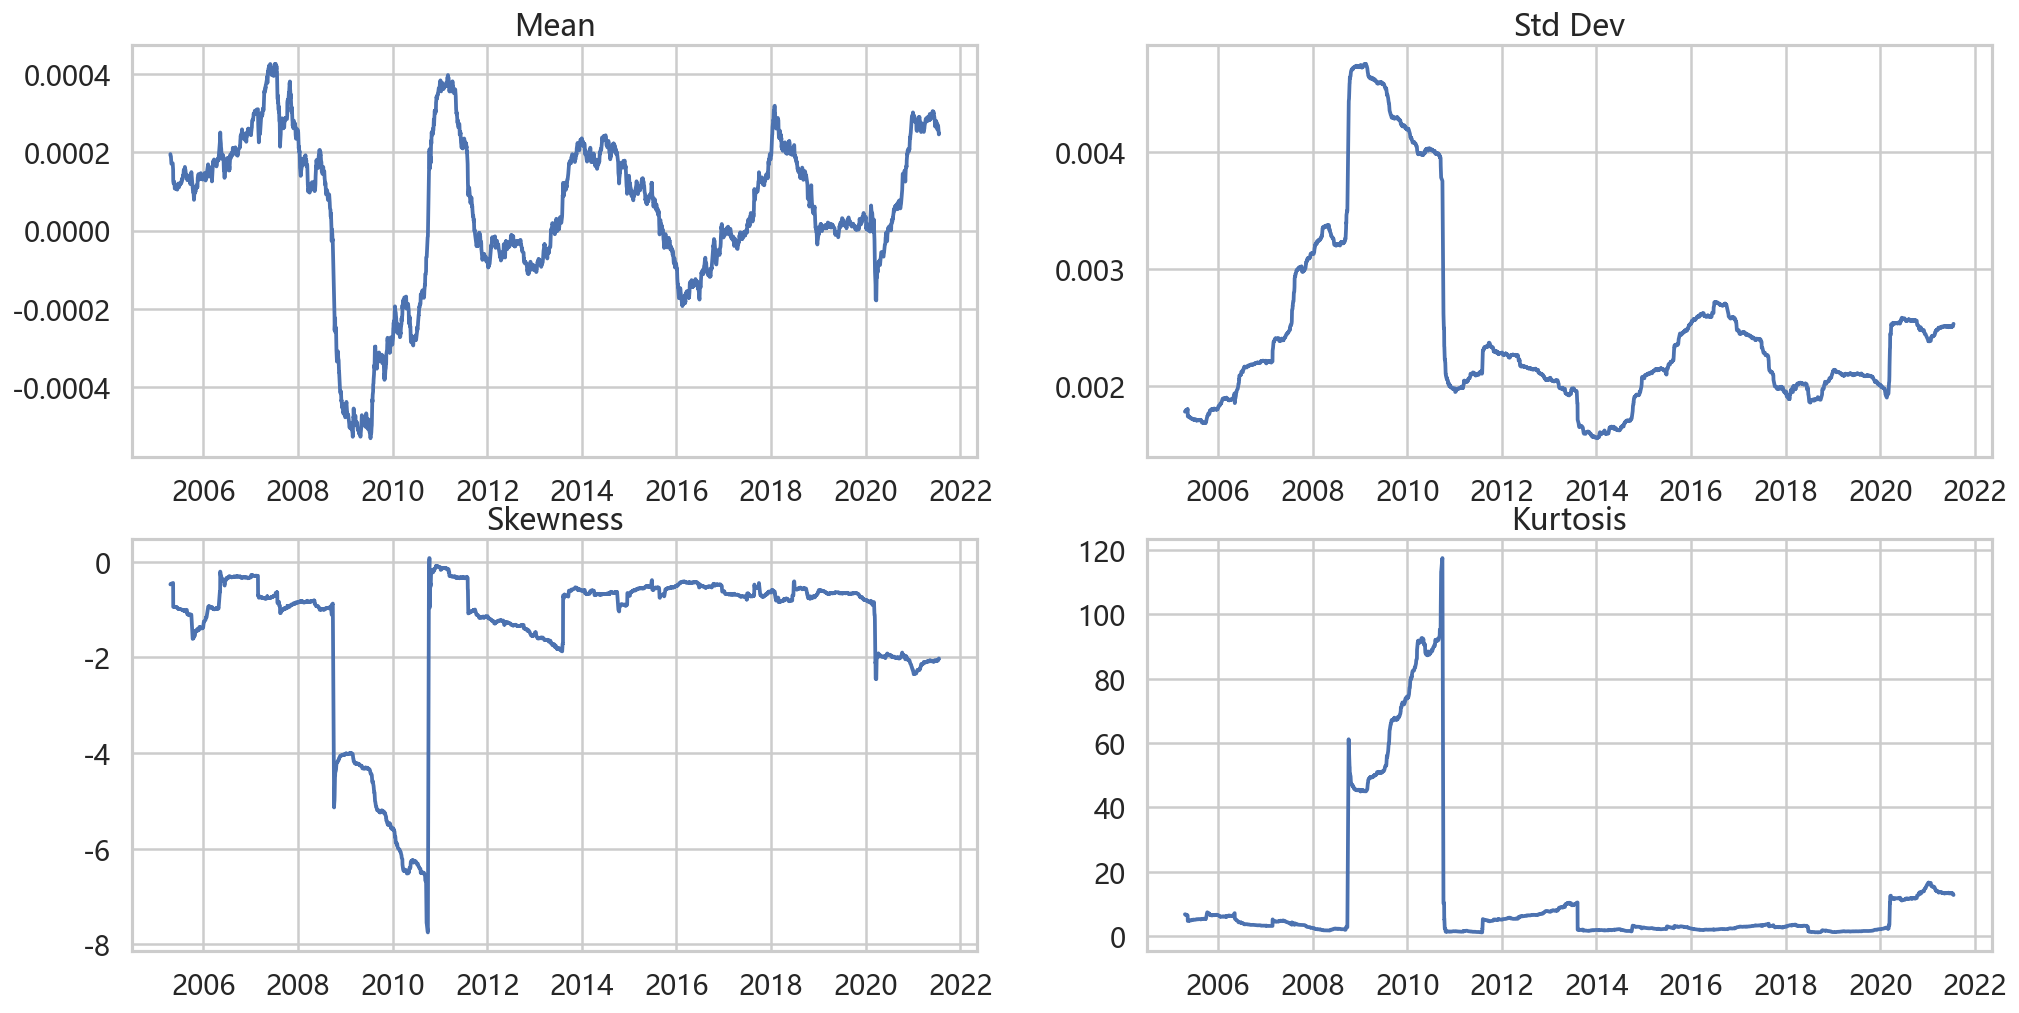

In [229]:
def graph(df_1):
    x=df_1.Date
    plt.figure(figsize=(20,10),dpi=120)
    plt.subplot(221)
    plt.plot(x,df_1.iloc[:,1],label='mean') 
    plt.title('Mean')
    plt.subplot(222)
    plt.plot(x,df_1.iloc[:,2],label='std')
    plt.title('Std Dev')
    plt.subplot(223)
    plt.plot(x,df_1.iloc[:,3],label='skewness')
    plt.title('Skewness')
    plt.subplot(224)
    plt.plot(x,df_1.iloc[:,4],label='kurtosis')
    plt.title('Kurtosis')
#     plt.legend()
    plt.show()
graph(df_1)

###  df_2-9

In [230]:
df_2= endow(2)
df_3= endow(3)
df_4= endow(4)
df_5= endow(5)
df_6= endow(6)
df_7= endow(7)
df_8= endow(8)
df_9= endow(9)

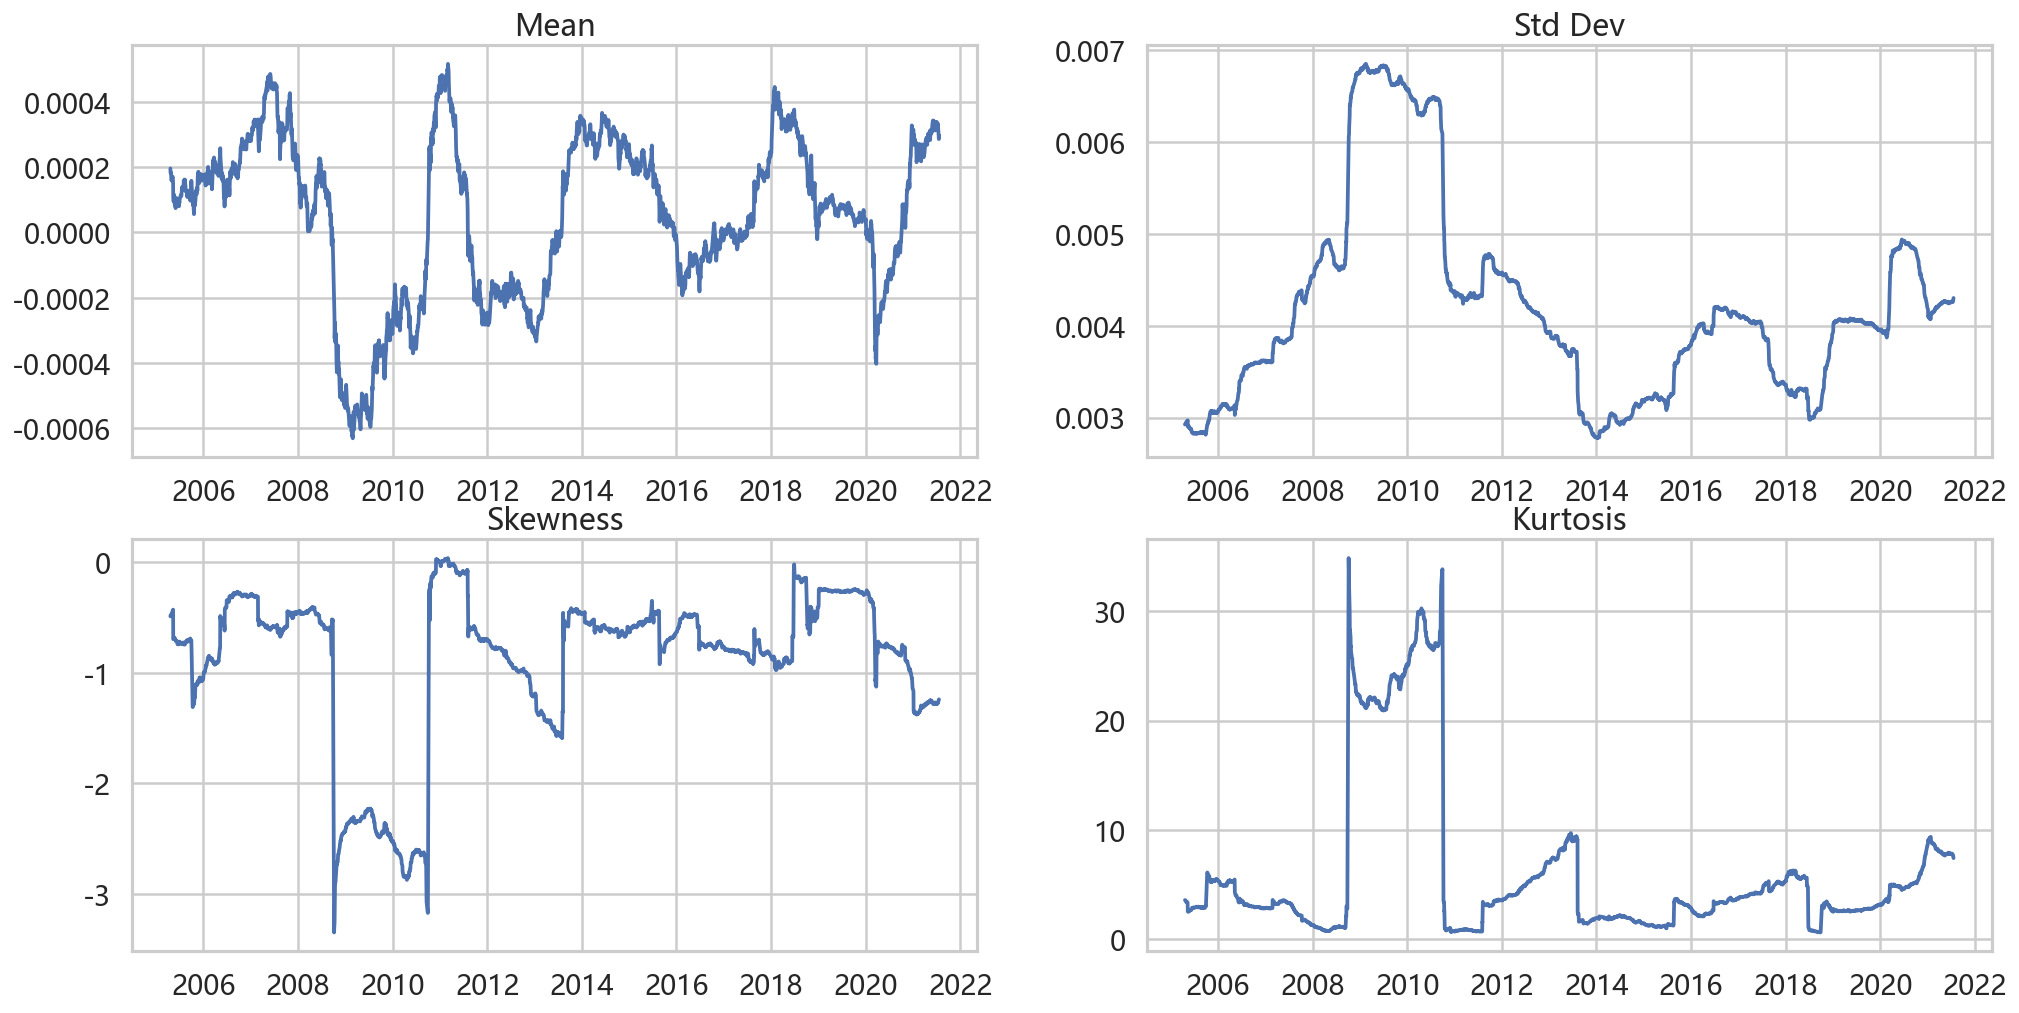

In [231]:
graph(df_2)

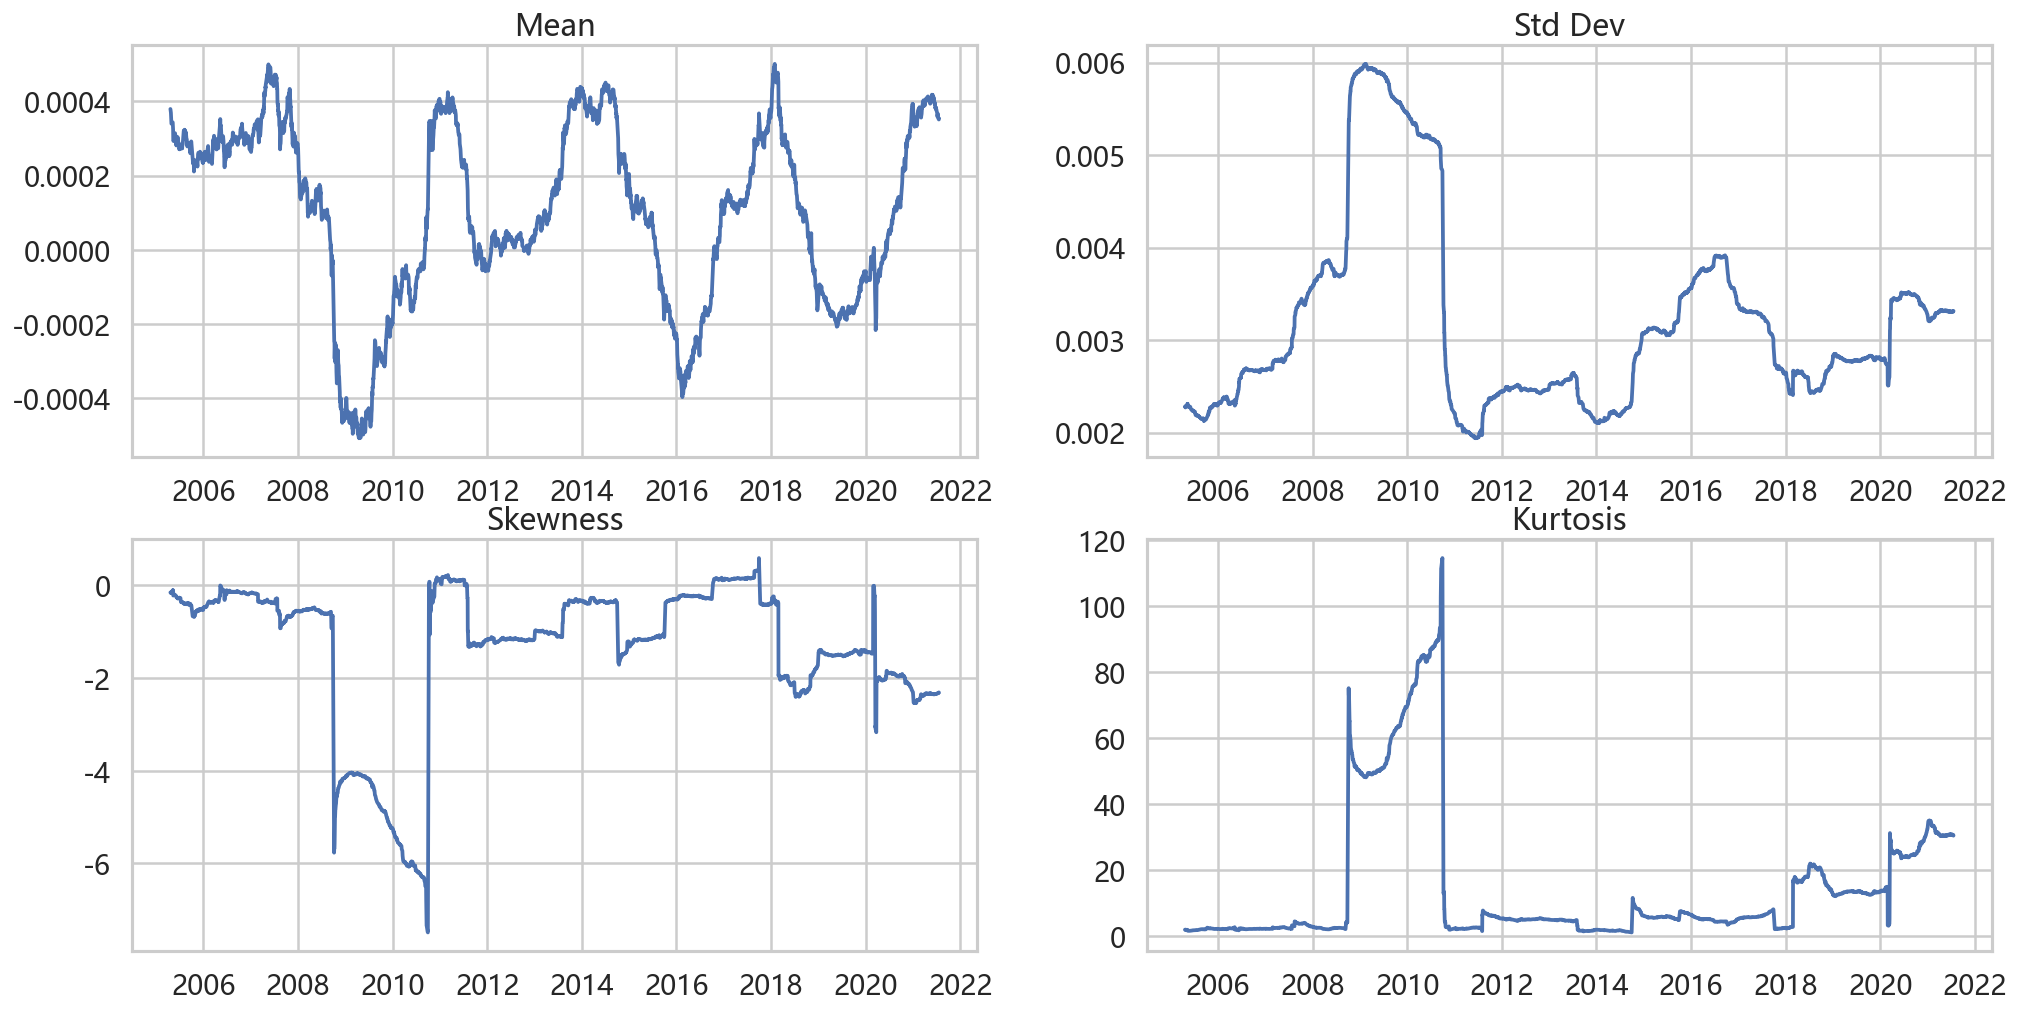

In [232]:
graph(df_3)

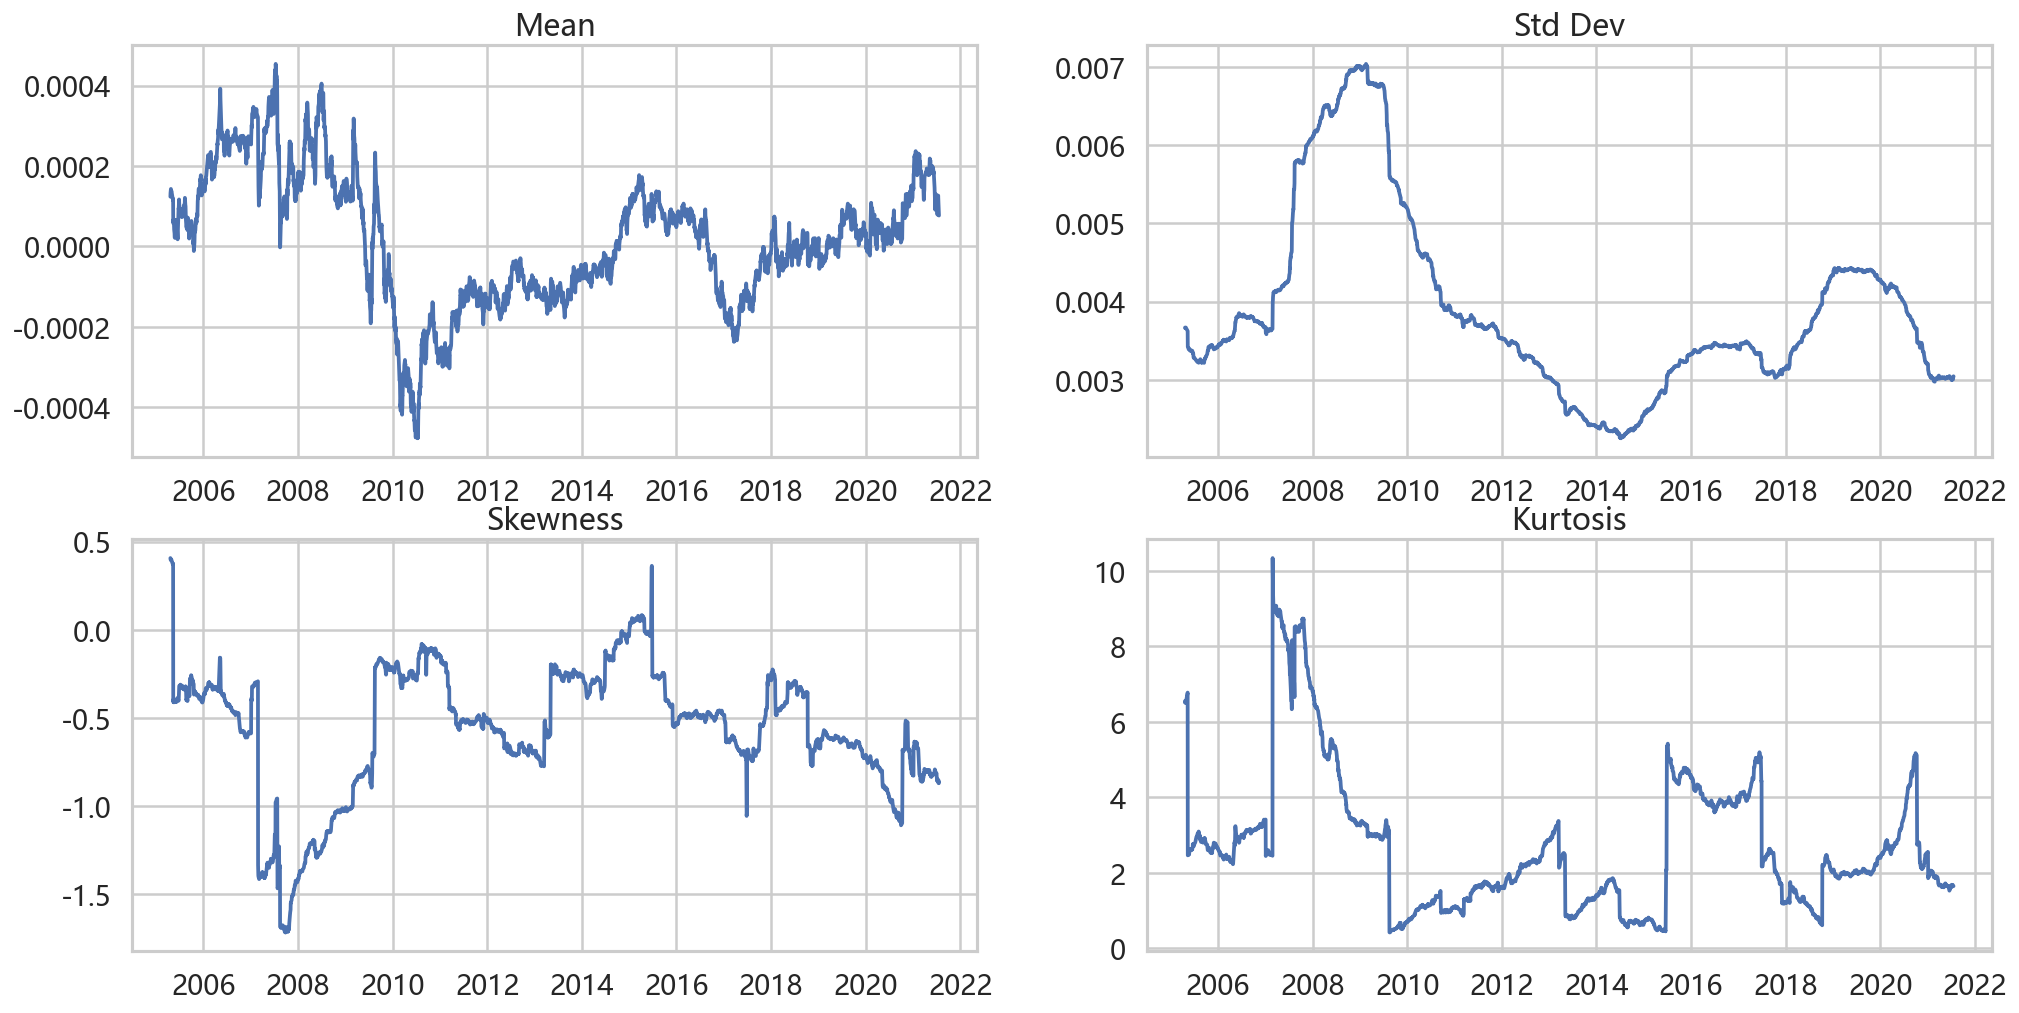

In [233]:
graph(df_4)

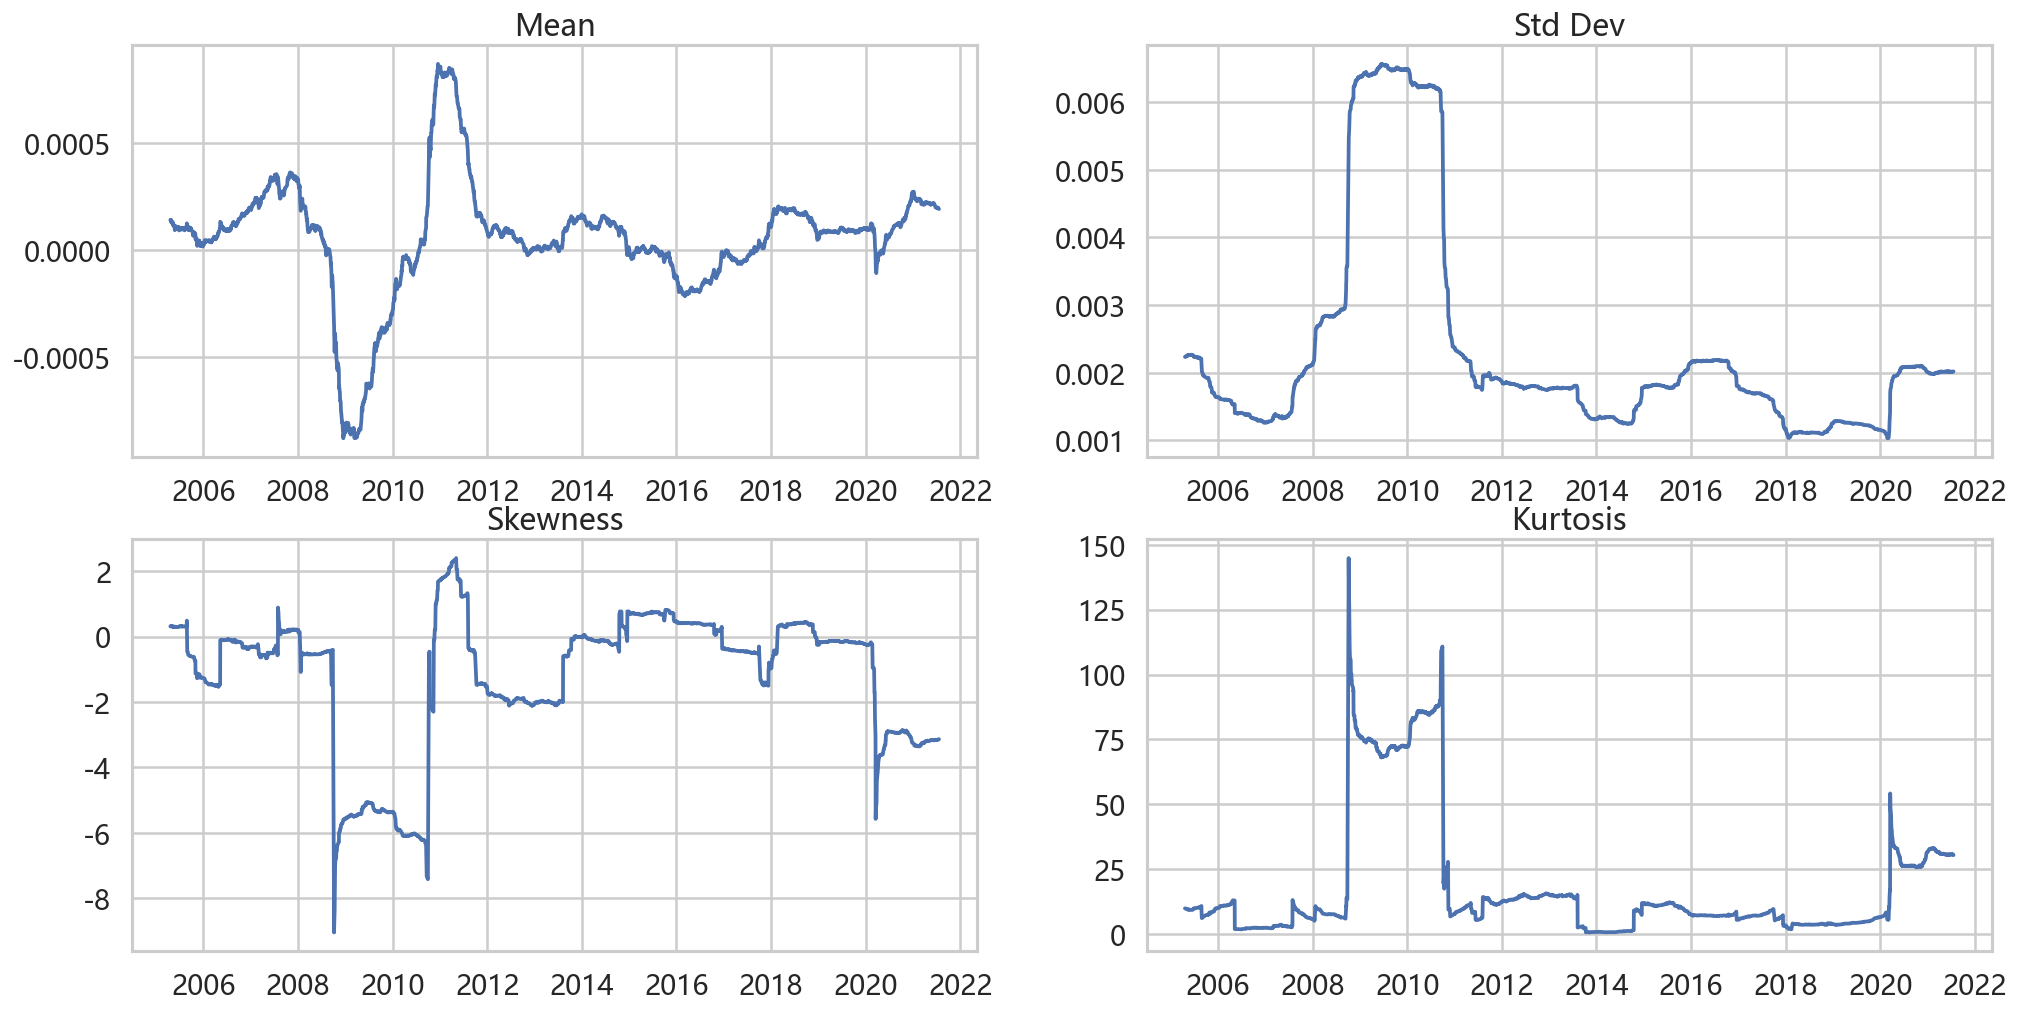

In [234]:
graph(df_5)

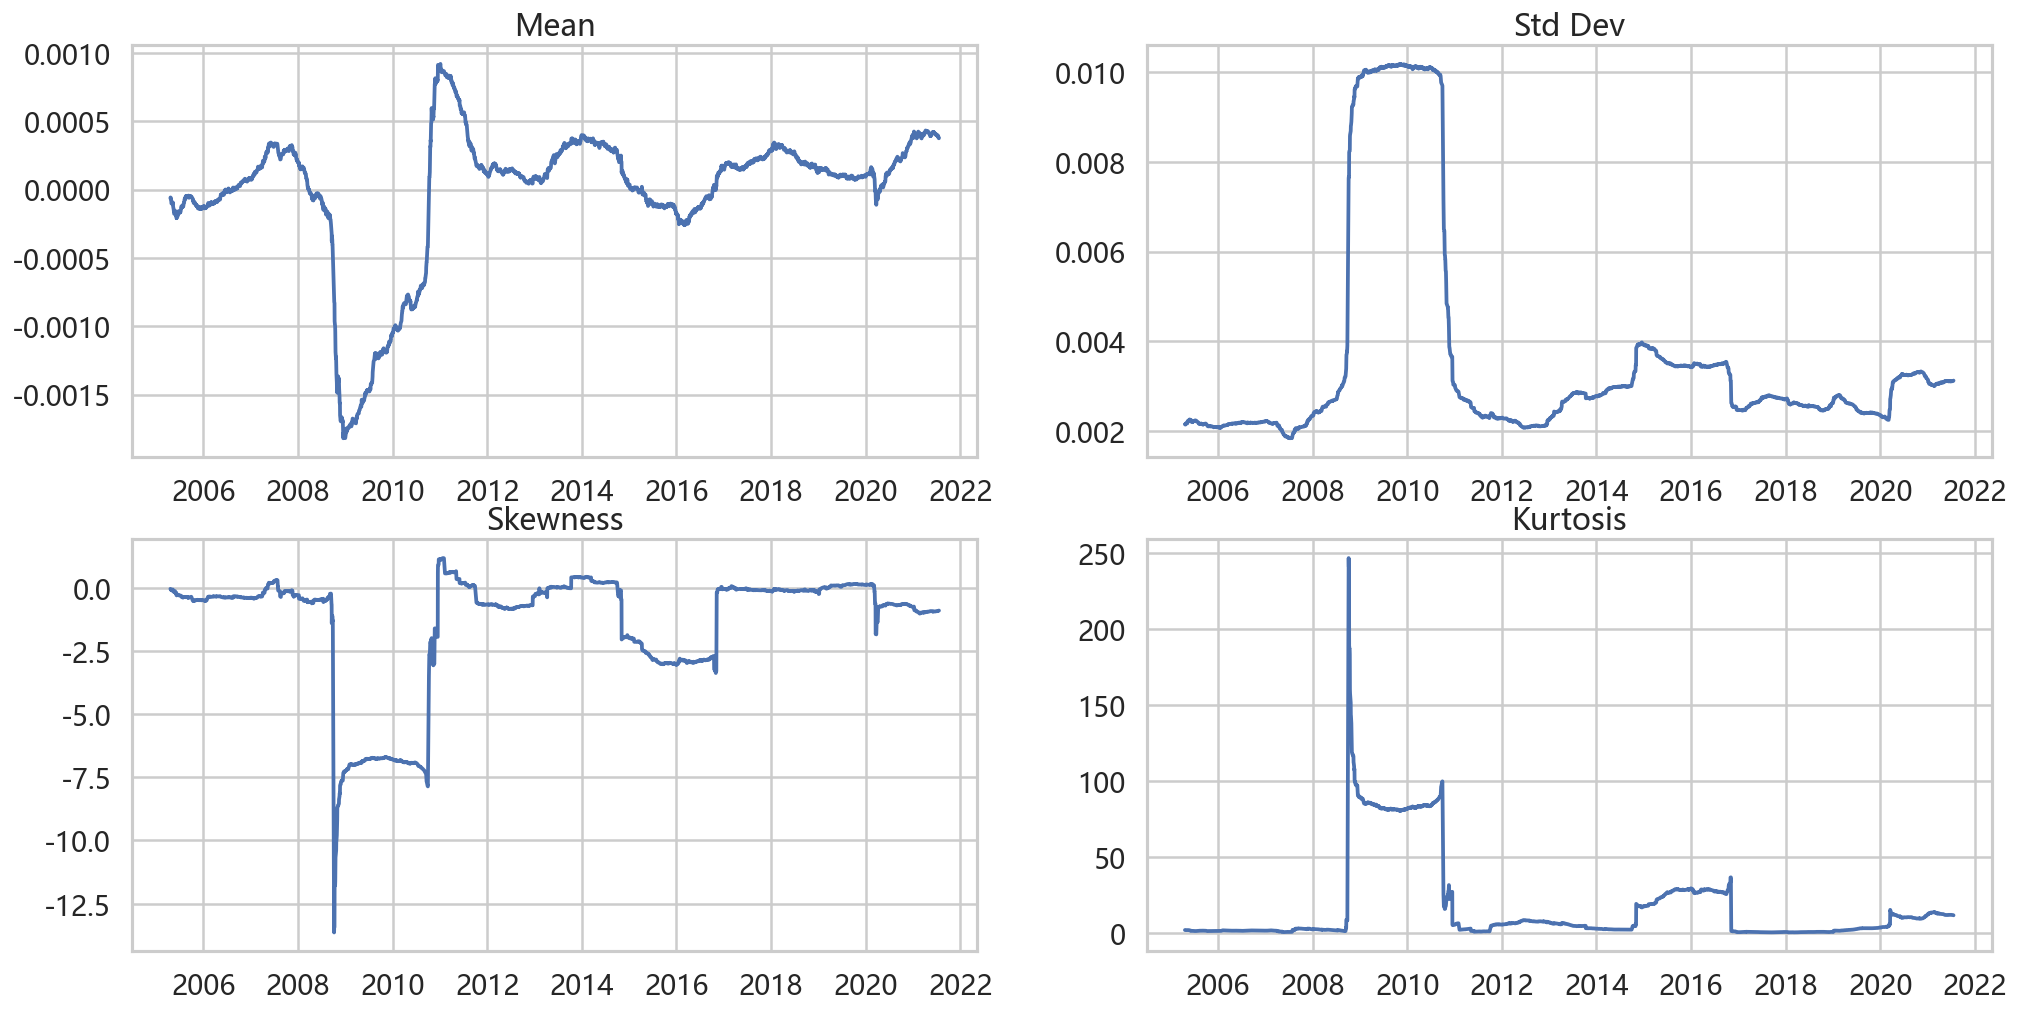

In [235]:
graph(df_6)

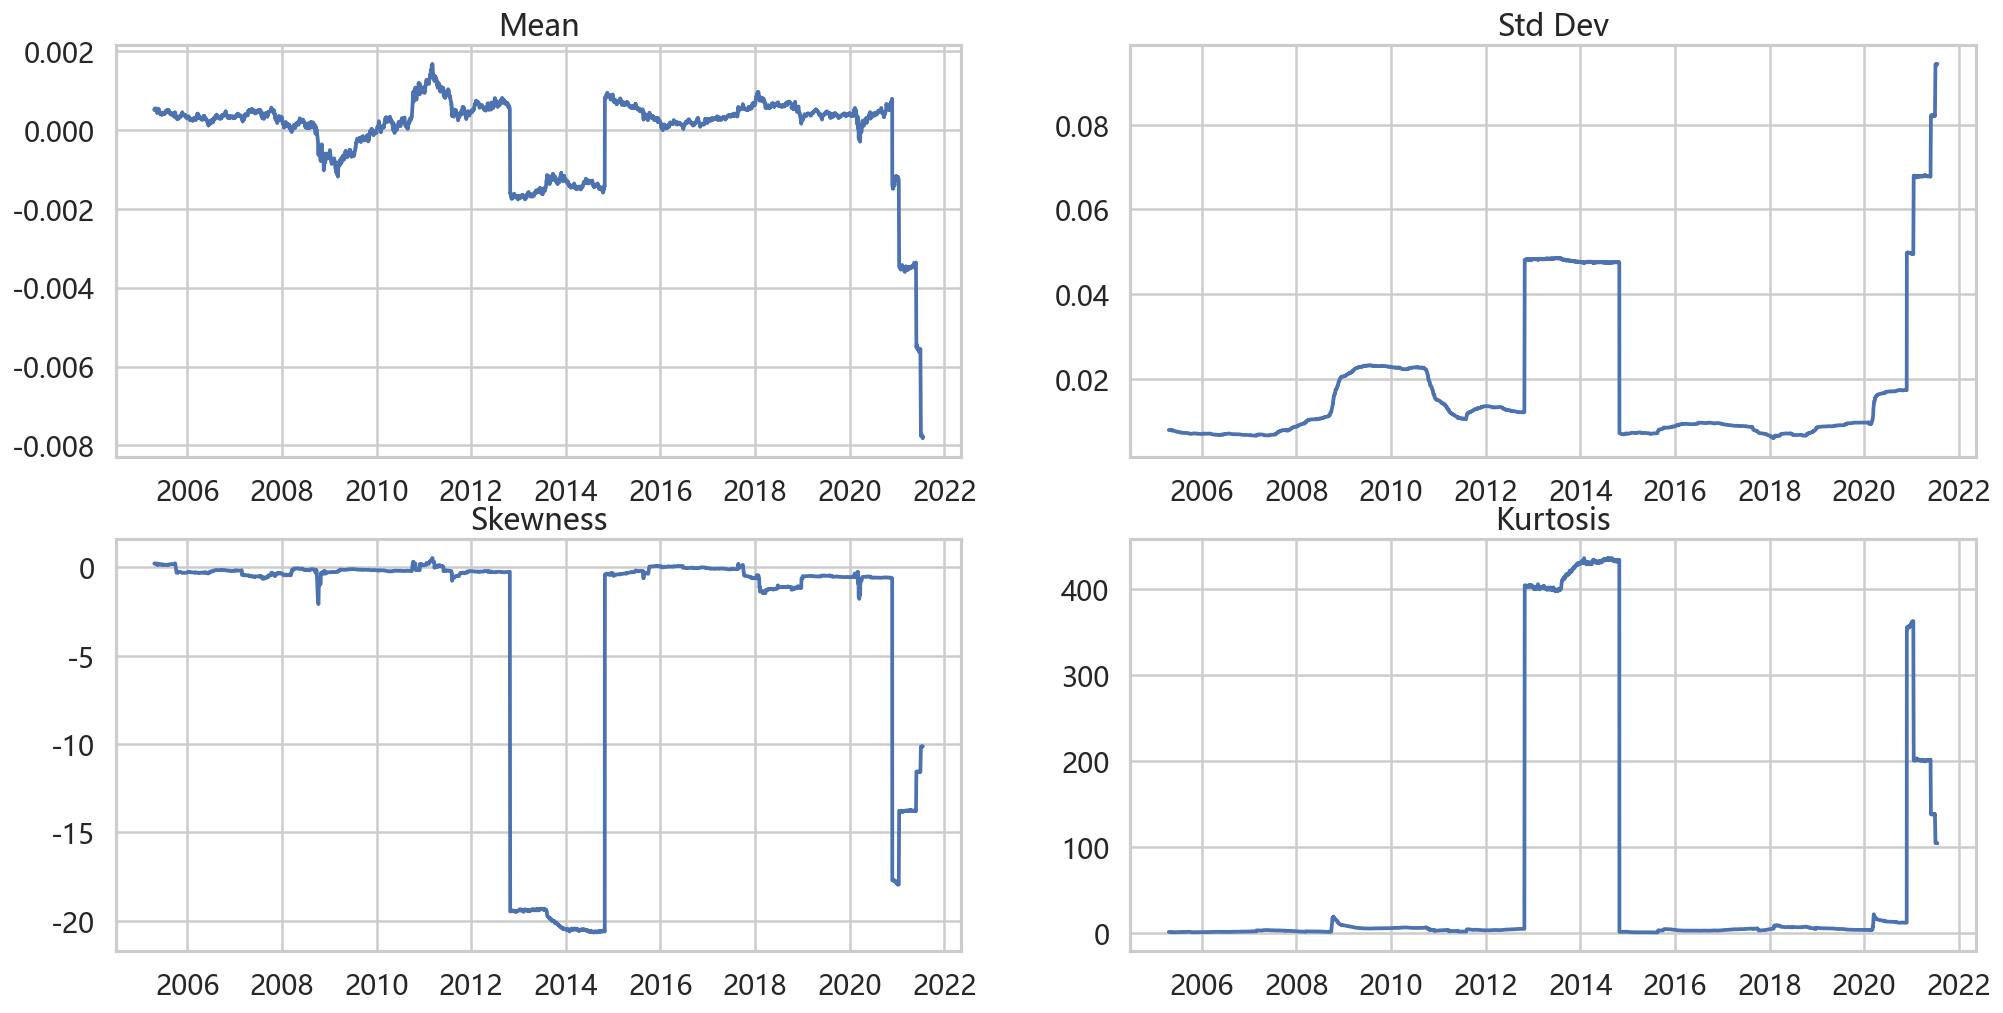

In [236]:
graph(df_7)

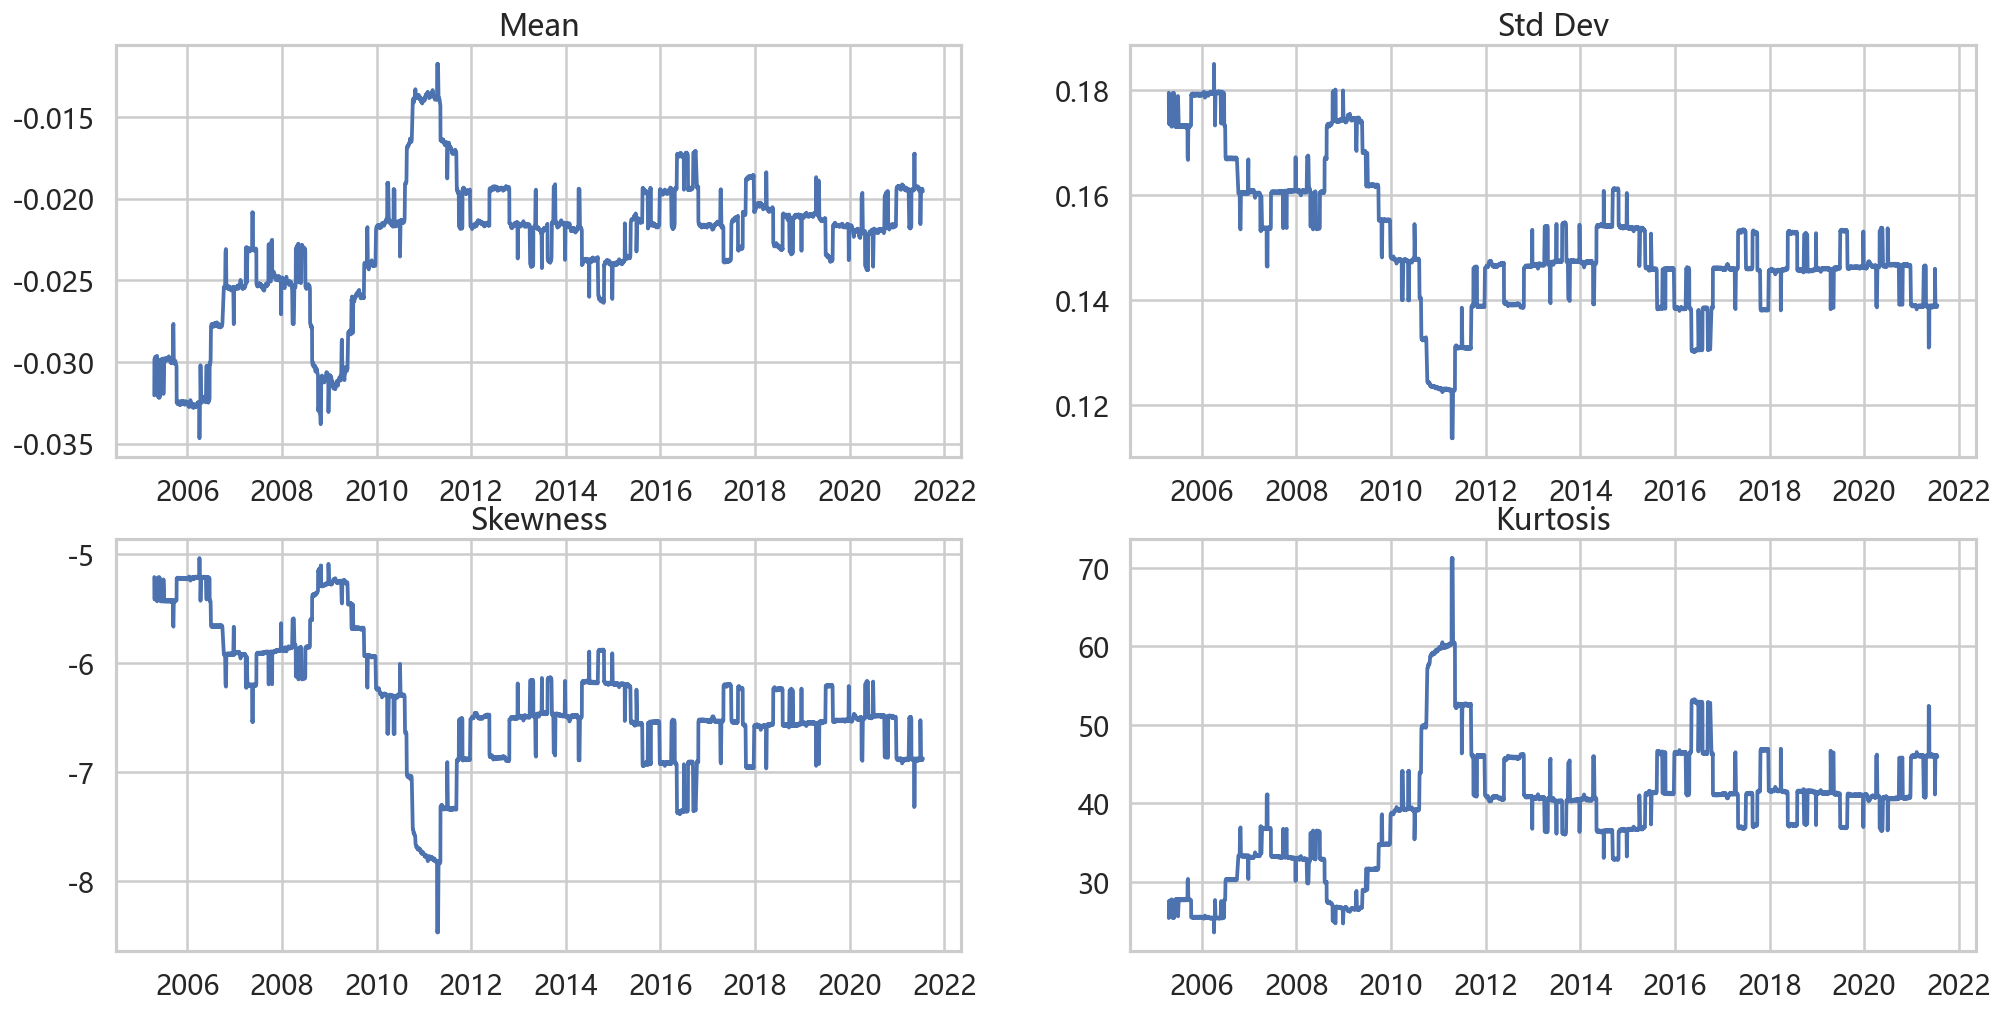

In [237]:
graph(df_8)

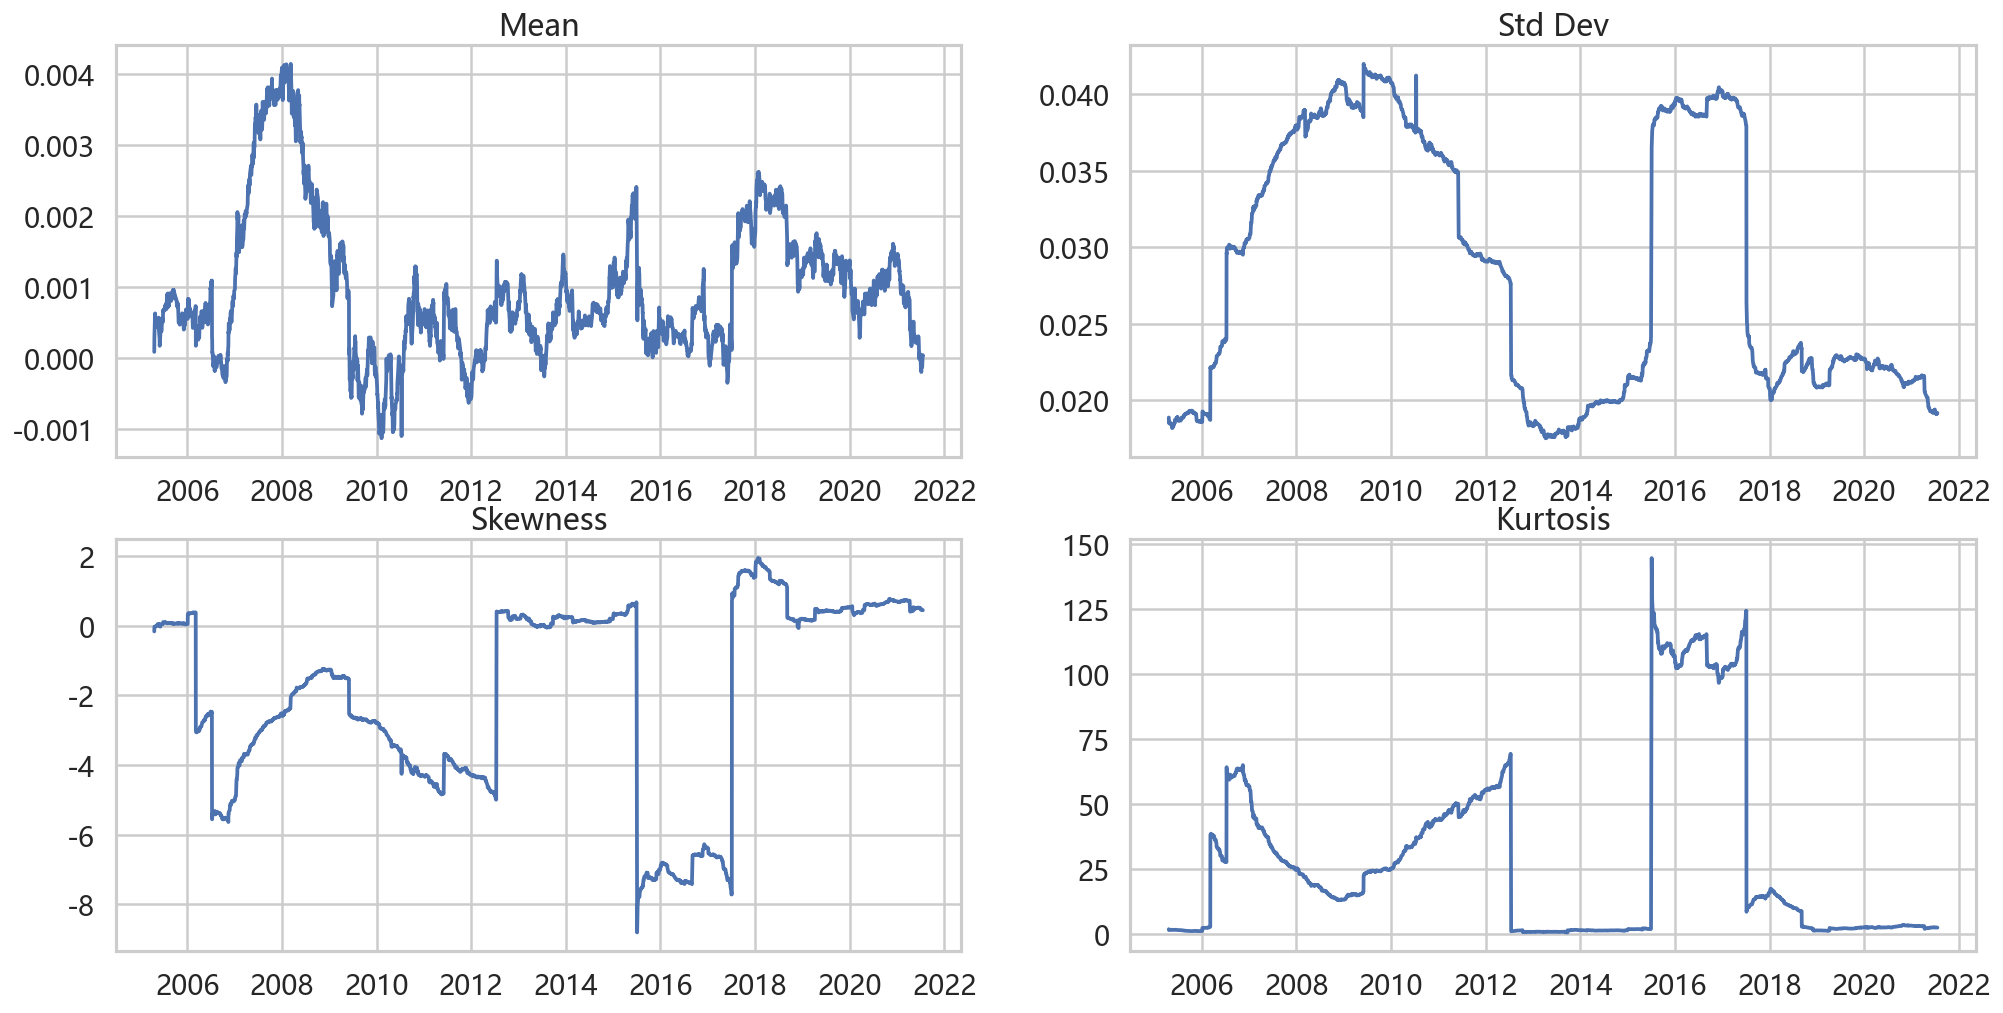

In [238]:
graph(df_9)

###  mean

In [244]:
lst_name=np.array(df_all.columns[1:])
lst_df=[df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9]
lst_df[0]['mean'].shape

(3738,)

In [247]:
def chart(col='mean'):
    plt.figure(figsize=(20,10),dpi=120)
    x=df_1.Date
    for i in range(9):
#         print(x.shape,lst_df[i][col].shape)
        plt.plot(x,lst_df[i][col],label=lst_name[i])
#     plt.plot(x,df_1[col],label=)
#     plt.plot(x,df_2[col])
#     plt.plot(x,df_3[col])
#     plt.plot(x,df_4[col])
#     plt.plot(x,df_5[col])
#     plt.plot(x,df_6[col])
#     plt.plot(x,df_7[col])
#     plt.plot(x,df_8[col])
#     plt.plot(x,df_9[col])
    plt.legend()
    plt.show()

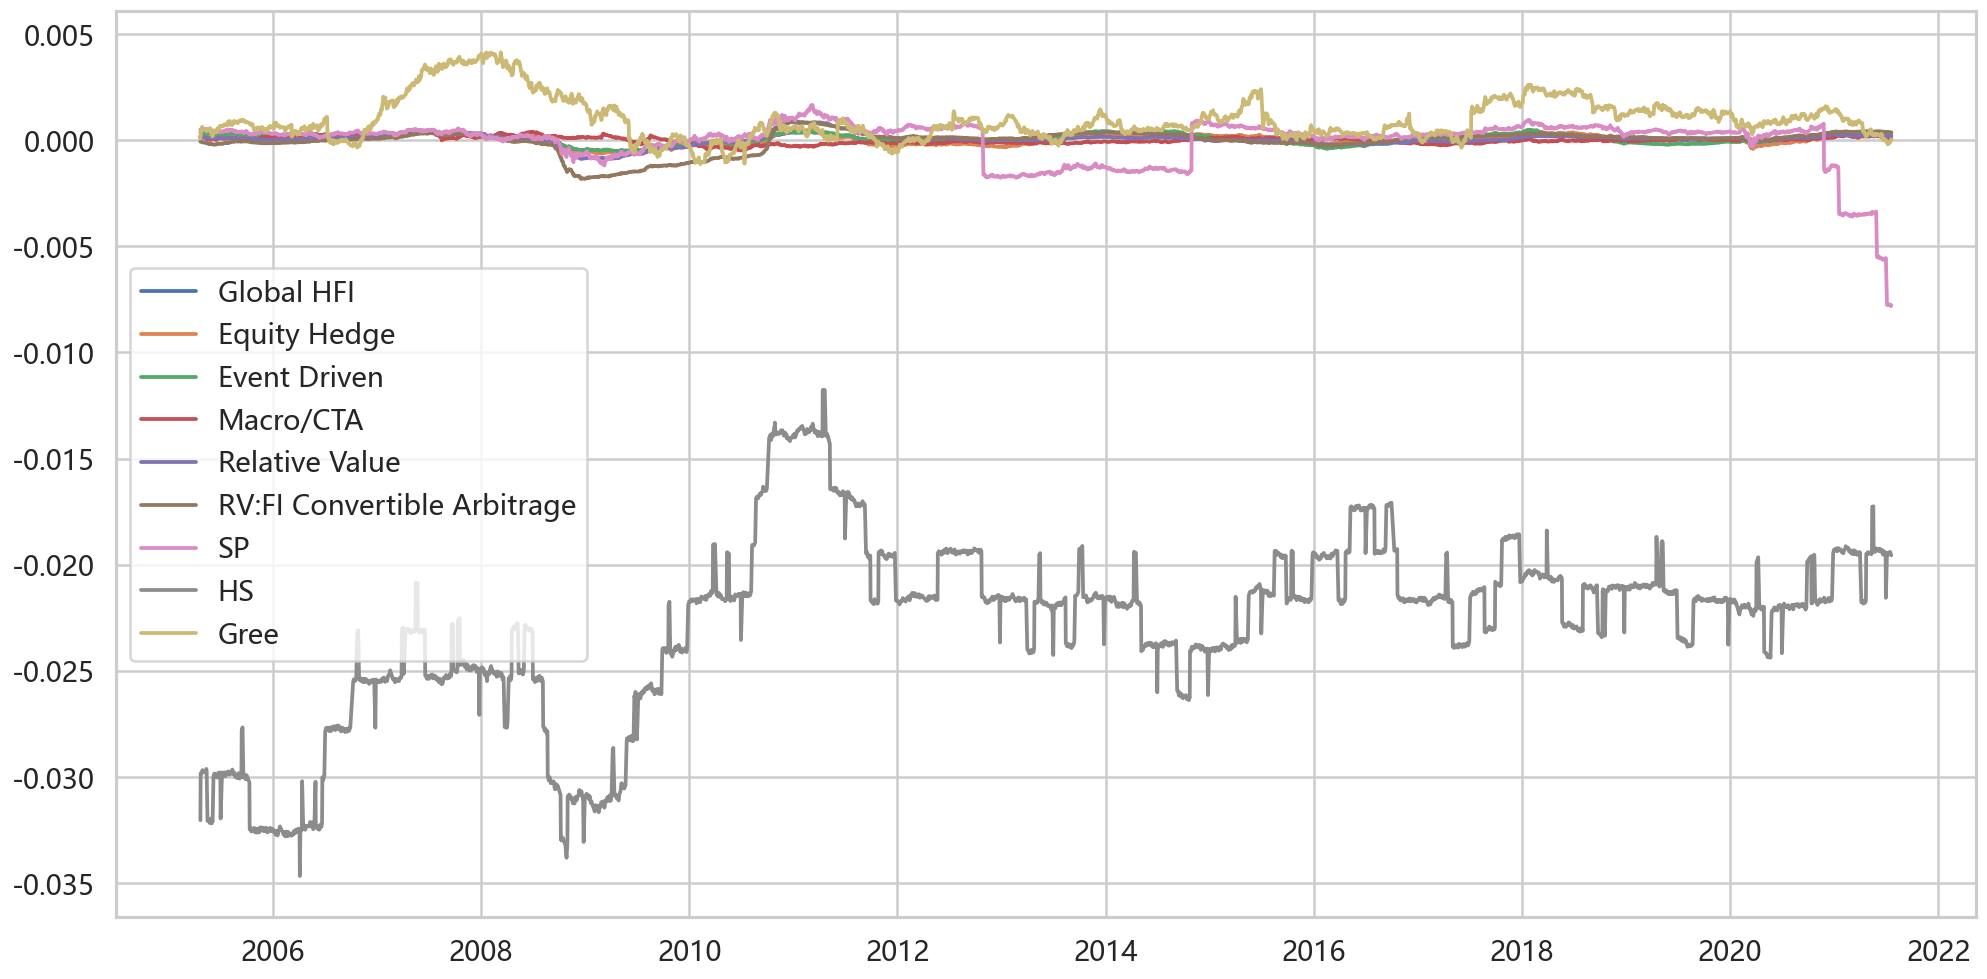

In [253]:
chart()

### std

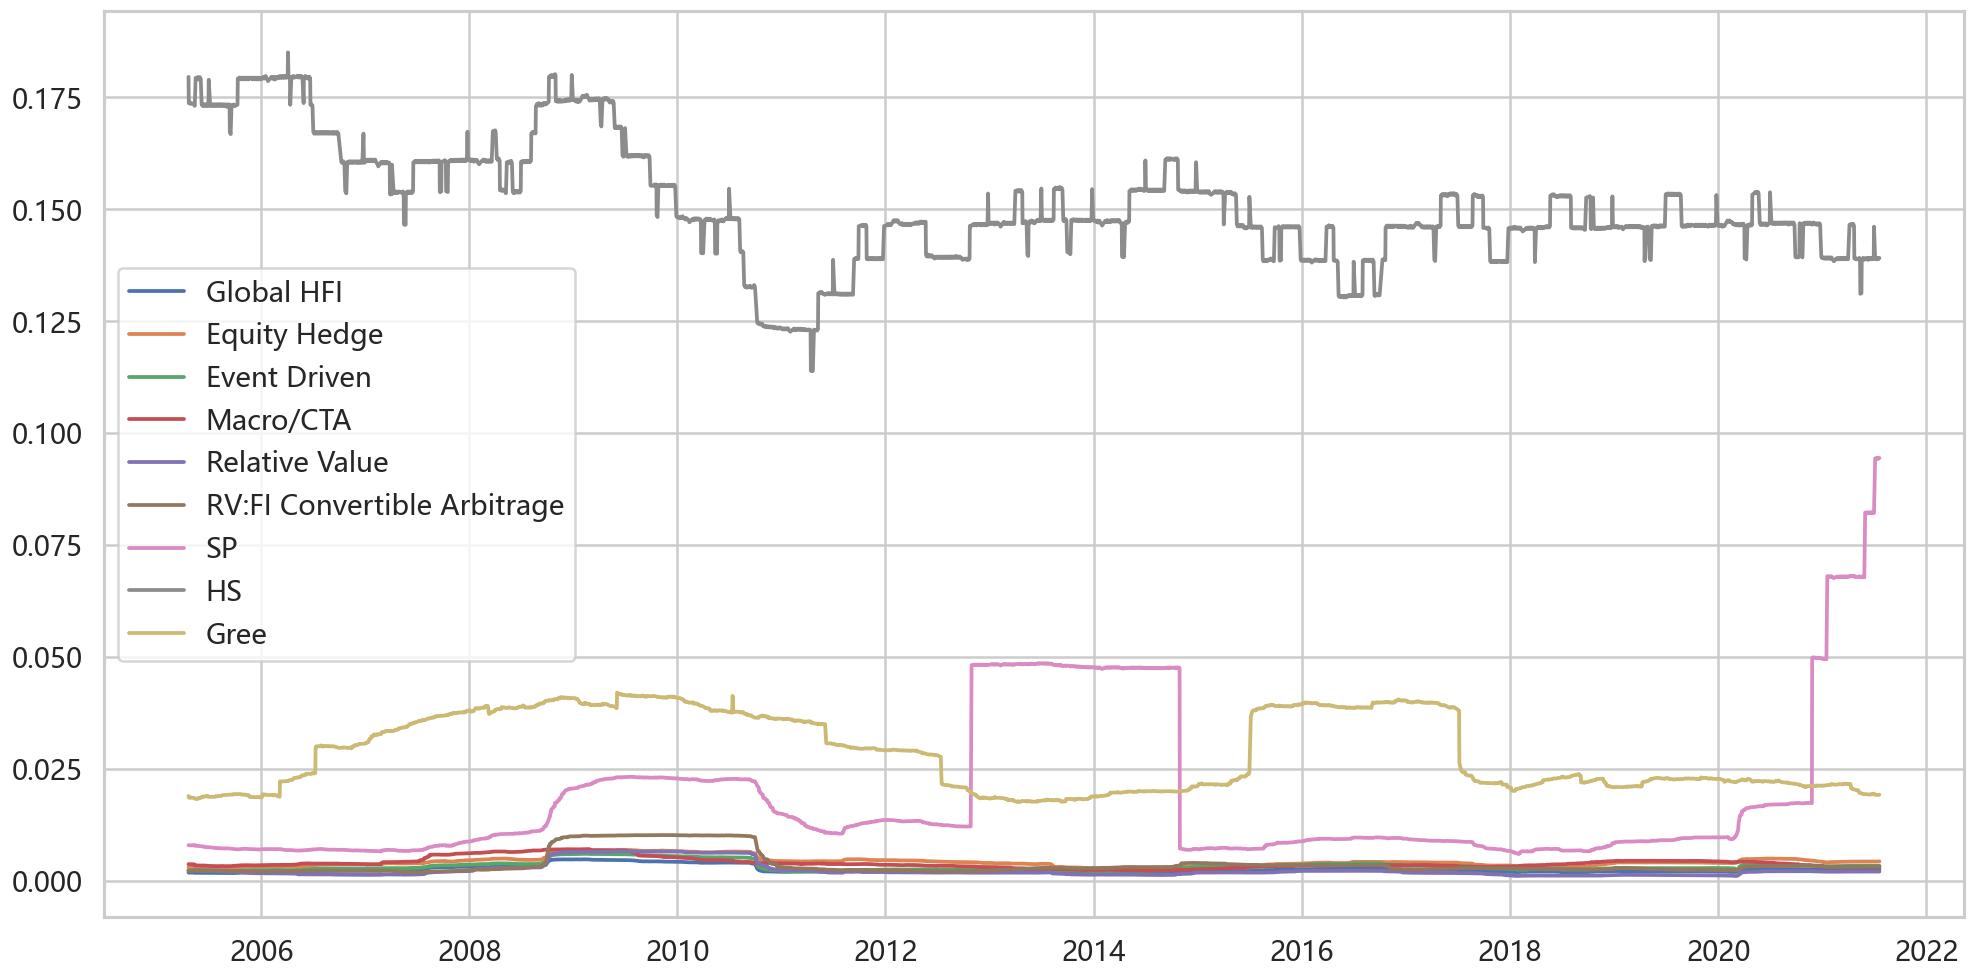

In [249]:
chart('std')

###  skew

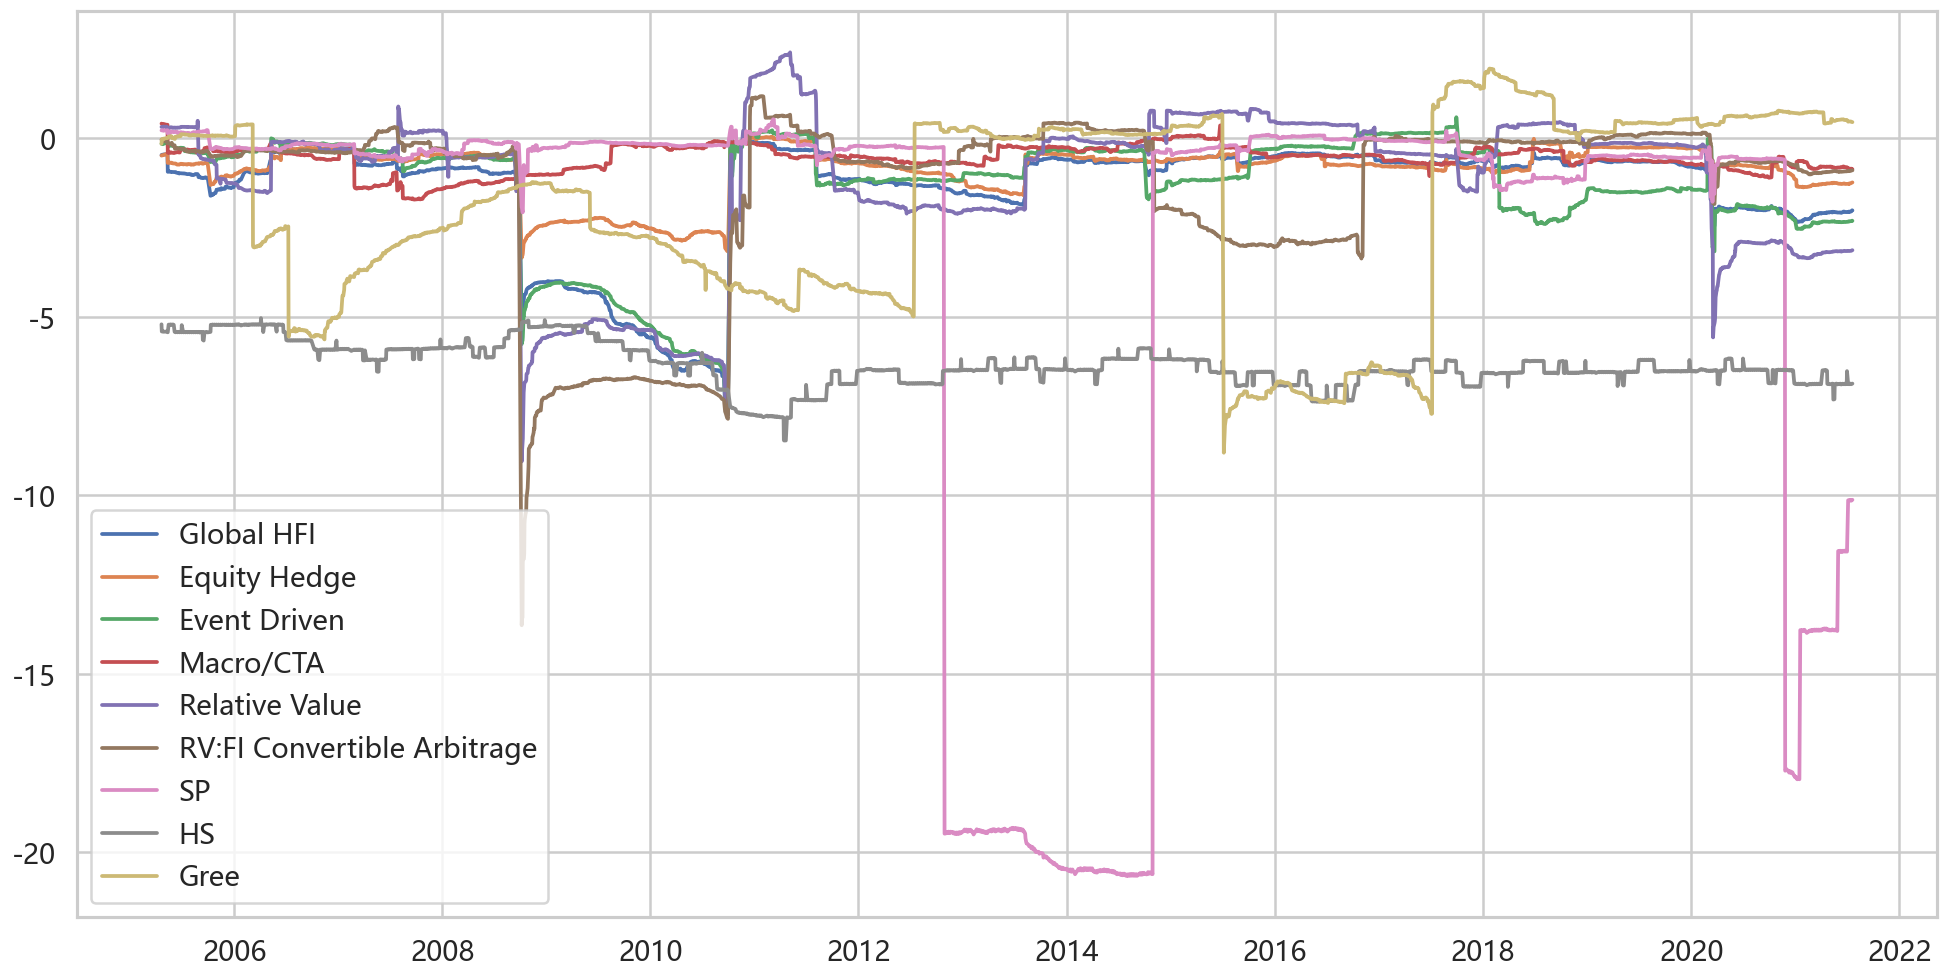

In [250]:
chart('skew')

###  kurt

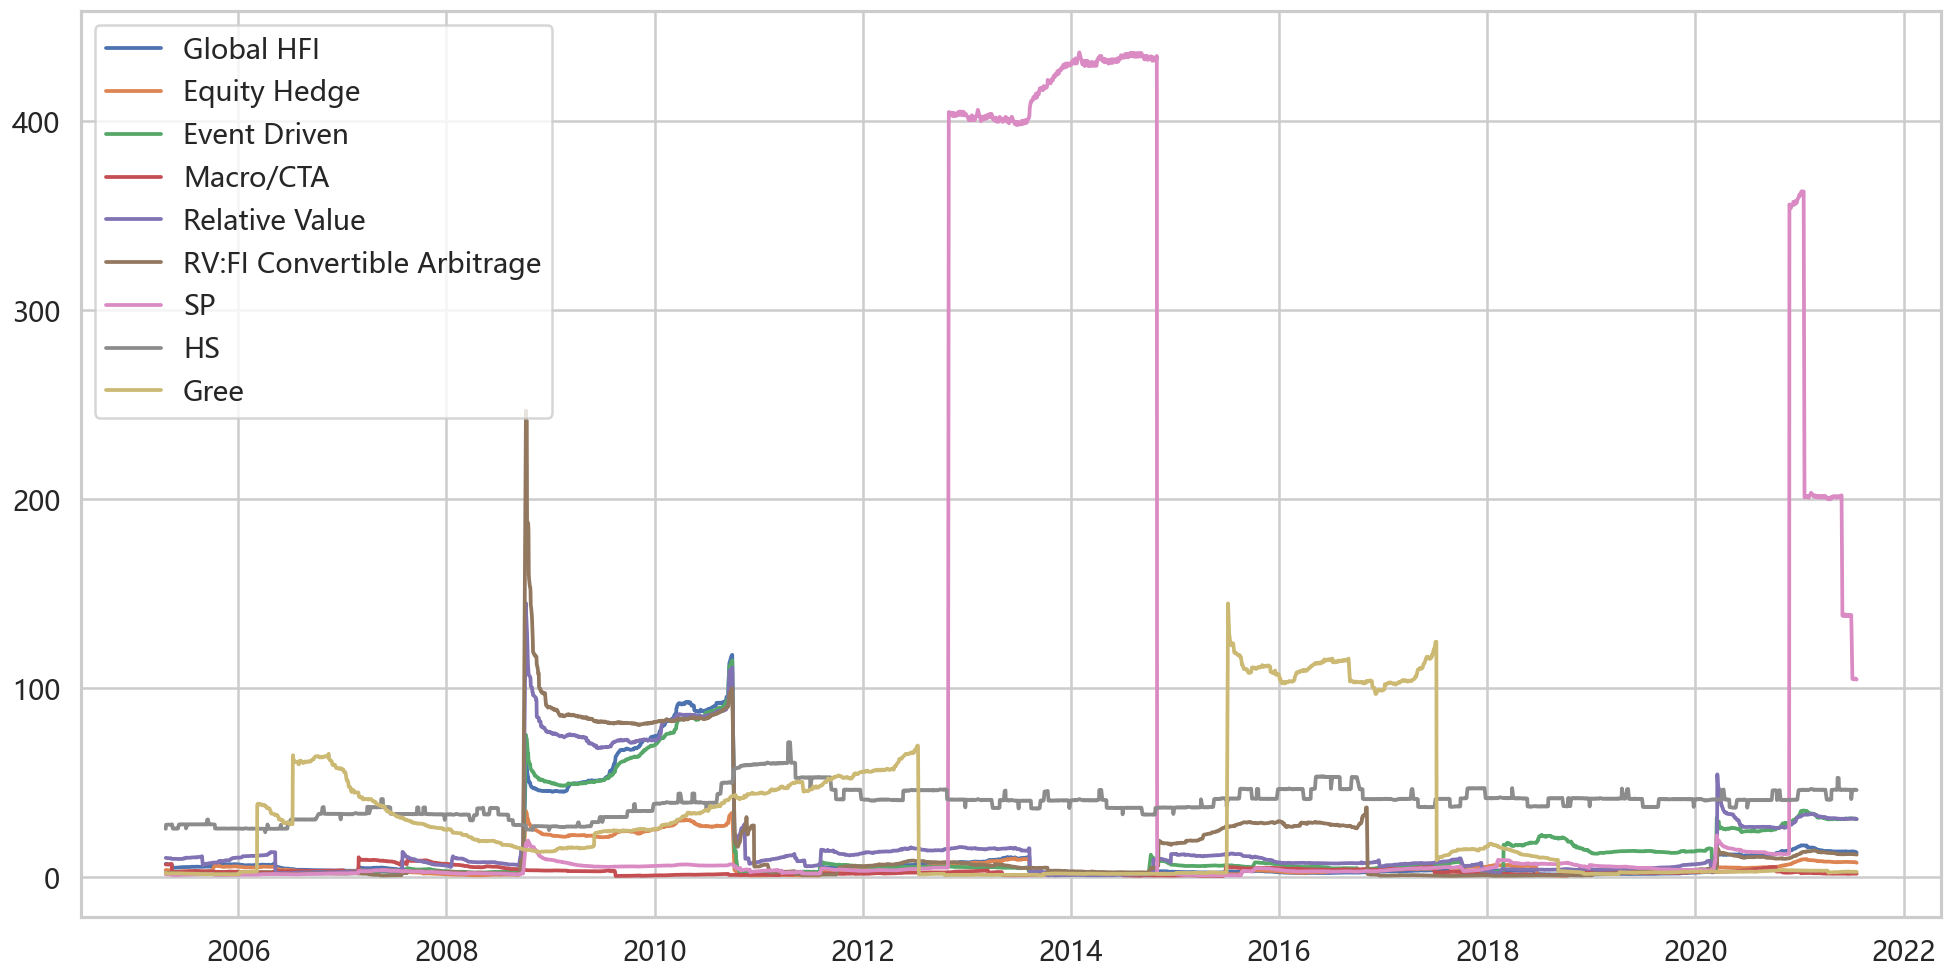

In [251]:
chart('kurt')

#  Alphas and Betas

In [352]:
import statsmodels.api as sm
def regression(col=9,price=False,df_all=df_all):
    #statsmodels中的线性模型大致分为两种：
    #基于数组的（array-based），
    #和基于公式的（formula-based）
    if price ==True:
        df_all=df_all_price
#     X_SP = df_all.iloc[:, 7] 
#     X_HS=df_all.iloc[:, 8] 
    X=df_all.iloc[:,[7,8]]
    Y = df_all.iloc[:, col] 
    X = sm.add_constant(X) # 若模型中有截距，必须有这一步
#     model_1 = sm.OLS(y_SP, x).fit() # 构建最小二乘模型并拟合
#     model_2 = sm.OLS(y_HS, x).fit() # 构建最小二乘模型并拟合
    model=sm.OLS(Y,X).fit()
    return model

In [353]:
df_all

,date,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage,SP,HS,Gree,enumerate
date,,,,,,,,,,,
2003-04-01,2003-04-01,0.002000,0.003760,0.000450,0.001510,0.000730,0.000540,0.012144,-0.004350,0.000000,0
2003-04-02,2003-04-02,0.002226,0.004533,0.002579,0.000989,0.000060,0.000670,0.026116,0.012714,0.003341,1
2003-04-03,2003-04-03,0.000737,0.001418,0.001834,-0.003491,-0.000470,0.001938,-0.005052,-0.006665,-0.012209,2
2003-04-04,2003-04-04,-0.000010,-0.001535,0.001254,0.000180,0.001300,0.001844,0.002738,0.020153,0.002247,3
2003-04-07,2003-04-07,-0.000896,-0.003928,0.001153,-0.002942,0.004902,0.001264,0.001229,0.015841,0.001121,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,2021-07-14,-0.000629,-0.001718,-0.001320,0.001325,0.000184,-0.000782,0.001165,-0.006292,0.004049,4199
2021-07-15,2021-07-15,-0.001628,-0.002345,-0.000859,-0.002959,-0.000764,-0.002539,-0.003262,0.007515,-0.002016,4200
2021-07-16,2021-07-16,-0.001288,-0.002879,-0.000039,-0.002196,-0.000184,-0.001187,-0.007539,0.000300,0.009899,4201


In [355]:
m9=regression()
print(m9.summary())
# print(m9_2.summary())
m9.params

                            OLS Regression Results                            
Dep. Variable:                   Gree   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.847
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           0.000397
Time:                        23:15:46   Log-Likelihood:                 8961.6
No. Observations:                4204   AIC:                        -1.792e+04
Df Residuals:                    4201   BIC:                        -1.790e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.481      0.0

const    0.001112
SP       0.028940
HS       0.009144
dtype: float64

In [358]:
def alpha_beta(price=False):
    df_temp=pd.DataFrame()
    alphas=[]
#     alphas_2=[]
    betas_1=[]
    betas_2=[]
    for i in range(1,8):
        if i==7:
            i=9
        m=regression(i,price)
        alphas.append(m.params[0])
        betas_1.append(m.params[1])
#         alphas_2.append(m_2.params[0])
        betas_2.append(m.params[2])
    df_temp['name']=np.array(lst_name)[[0,1,2,3,4,5,8]]
    print(lst_name)
    print(alphas)
    df_temp['alpha']=alphas
    df_temp['beta_SP']=betas_1
#     df_temp['alpha_HS']=alphas_2
    df_temp['beta_HS']=betas_2
    return df_temp

## return

In [359]:
df_alpha_beta=alpha_beta()
df_alpha_beta.to_csv('alpha_beta.csv',index=False)
df_alpha_beta

['Global HFI' 'Equity Hedge' 'Event Driven' 'Macro/CTA' 'Relative Value'
 'RV:FI Convertible Arbitrage' 'SP' 'HS' 'Gree' 'enumerate']
[0.000107007697633382, 0.0001382515882885375, 0.00016964082007459765, 3.613873086637284e-05, 9.557694220562351e-05, 2.2129496142142972e-05, 0.0011115479935035228]


,name,alpha,beta_SP,beta_HS
0,Global HFI,0.000107,0.014655,0.000662
1,Equity Hedge,0.000138,0.028285,0.001051
2,Event Driven,0.000170,0.018023,0.000816
3,Macro/CTA,0.000036,0.002732,0.000022
4,Relative Value,0.000096,0.007582,0.000684
5,RV:FI Convertible Arbitrage,0.000022,0.002678,0.000192
6,Gree,0.001112,0.028940,0.009144


## price

In [360]:
df_alpha_beta_price=alpha_beta(price=True)
df_alpha_beta_price.to_csv('alpha_beta_Price.csv',index=False)
df_alpha_beta_price

['Global HFI' 'Equity Hedge' 'Event Driven' 'Macro/CTA' 'Relative Value'
 'RV:FI Convertible Arbitrage' 'SP' 'HS' 'Gree' 'enumerate']
[952.6163381539368, 965.0226736821155, 874.4110241097933, 1089.2524902703926, 882.9312213896864, 985.7460974667497, -20.091664732840417]


,name,alpha,beta_SP,beta_HS
0,Global HFI,952.616338,0.030117,0.009067
1,Equity Hedge,965.022674,0.029529,0.007376
2,Event Driven,874.411024,0.087918,0.018605
3,Macro/CTA,1089.252490,-0.057913,0.009363
4,Relative Value,882.931221,0.045039,0.008624
5,RV:FI Convertible Arbitrage,985.746097,0.093272,-0.015655
6,Gree,-20.091665,0.009214,0.001492


#  Correlation

## HFRX

In [310]:
df_HFRX_return=df_all.iloc[:,1:7]
df_HFRX_return

,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage
date,,,,,,
2003-04-01,0.002000,0.003760,0.000450,0.001510,0.000730,0.000540
2003-04-02,0.002226,0.004533,0.002579,0.000989,0.000060,0.000670
2003-04-03,0.000737,0.001418,0.001834,-0.003491,-0.000470,0.001938
2003-04-04,-0.000010,-0.001535,0.001254,0.000180,0.001300,0.001844
2003-04-07,-0.000896,-0.003928,0.001153,-0.002942,0.004902,0.001264
...,...,...,...,...,...,...
2021-07-14,-0.000629,-0.001718,-0.001320,0.001325,0.000184,-0.000782
2021-07-15,-0.001628,-0.002345,-0.000859,-0.002959,-0.000764,-0.002539
2021-07-16,-0.001288,-0.002879,-0.000039,-0.002196,-0.000184,-0.001187


In [311]:
df_HFRX_price=df_all_price.iloc[:,1:7]
df_HFRX_price

,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage
0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
1,1002.00,1003.76,1000.45,1001.51,1000.73,1000.54
2,1004.23,1008.31,1003.03,1002.50,1000.79,1001.21
3,1004.97,1009.74,1004.87,999.00,1000.32,1003.15
4,1004.96,1008.19,1006.13,999.18,1001.62,1005.00
...,...,...,...,...,...,...
4306,1431.02,1441.47,1815.23,1246.92,1360.82,996.46
4307,1428.69,1438.09,1813.67,1243.23,1359.78,993.93
4308,1426.85,1433.95,1813.60,1240.50,1359.53,992.75
4309,1418.72,1420.68,1807.82,1228.31,1357.36,989.62


###  相关性矩阵

In [343]:
corr1=df_HFRX_return.corr()
corr1.to_csv('corr1.csv')
corr1

,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage
Global HFI,1.000000,0.905598,0.848660,0.466090,0.674846,0.363431
Equity Hedge,0.905598,1.000000,0.748281,0.243756,0.492142,0.228905
Event Driven,0.848660,0.748281,1.000000,0.177378,0.541754,0.297735
Macro/CTA,0.466090,0.243756,0.177378,1.000000,0.094235,0.006554
Relative Value,0.674846,0.492142,0.541754,0.094235,1.000000,0.556836
RV:FI Convertible Arbitrage,0.363431,0.228905,0.297735,0.006554,0.556836,1.000000


In [344]:
corr2=df_HFRX_price.corr()
corr2.to_csv('corr2.csv')
corr2

,Global HFI,Equity Hedge,Event Driven,Macro/CTA,Relative Value,RV:FI Convertible Arbitrage
Global HFI,1.000000,0.905444,0.861406,0.286802,0.867129,0.369747
Equity Hedge,0.905444,1.000000,0.633211,0.289259,0.674235,0.567127
Event Driven,0.861406,0.633211,1.000000,0.085207,0.810946,0.001556
Macro/CTA,0.286802,0.289259,0.085207,1.000000,-0.085157,-0.175962
Relative Value,0.867129,0.674235,0.810946,-0.085157,1.000000,0.341457
RV:FI Convertible Arbitrage,0.369747,0.567127,0.001556,-0.175962,0.341457,1.000000


###  correlation histogram

In [332]:
array_corr2=np.delete(np.unique(np.array(corr2)),[-1])#按照索引，删除指定元素
array_corr1=np.delete(np.unique(np.array(corr1)),[-1])#按照索引，删除指定元素
array_corr1,array_corr2

(array([0.00655375, 0.09423493, 0.17737808, 0.22890456, 0.24375577,
        0.29773505, 0.36343083, 0.46609041, 0.49214164, 0.54175355,
        0.55683598, 0.67484551, 0.74828092, 0.84866041, 0.90559795]),
 array([-0.17596204, -0.08515664,  0.00155606,  0.08520736,  0.28680158,
         0.28925867,  0.34145672,  0.36974709,  0.56712736,  0.63321113,
         0.67423466,  0.81094627,  0.86140562,  0.86712885,  0.90544423]))

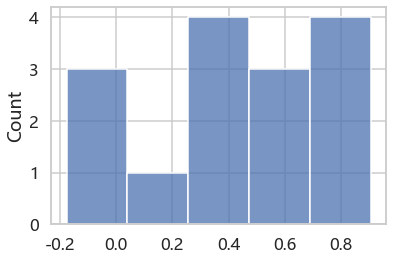

In [346]:
sns.histplot(array_corr2)
plt.show()

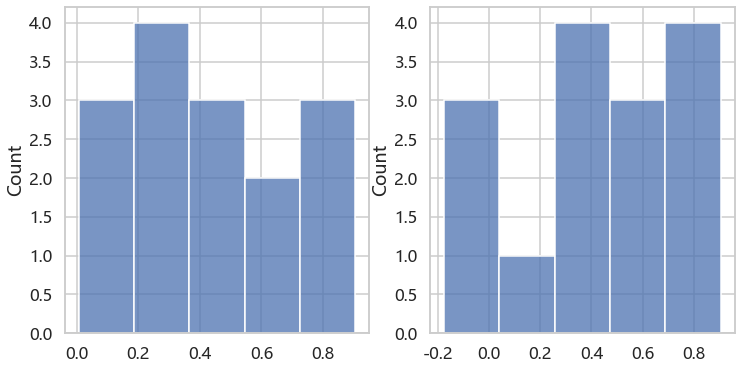

In [342]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(array_corr1)
plt.subplot(122)
sns.histplot(array_corr2)
plt.show()

###  heatmap

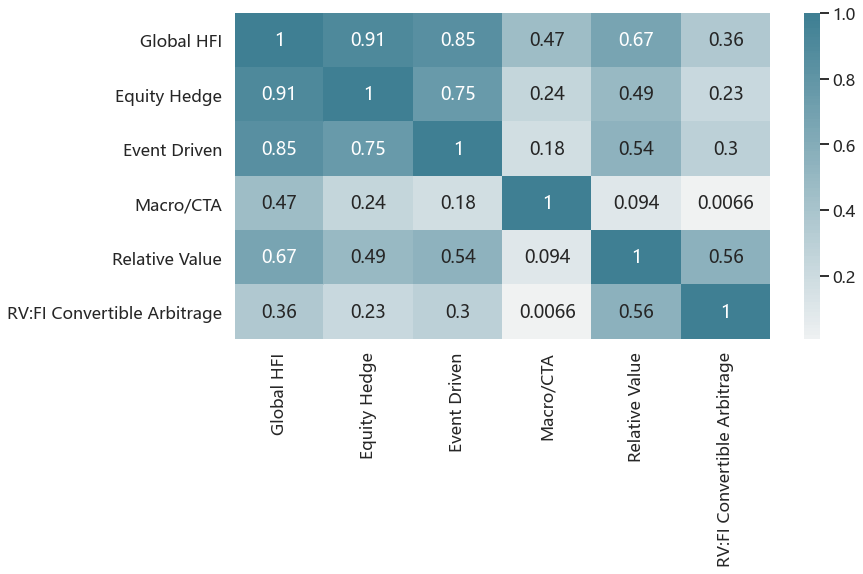

In [297]:
plt.figure(figsize=(12,6))
sns.heatmap(df_HFRX.corr(),cmap=sns.diverging_palette(20, 220, n=200), 
            annot=True, # 注入数据
            center = 0) # 绘制有色数据时将色彩映射居中的值)
plt.show()

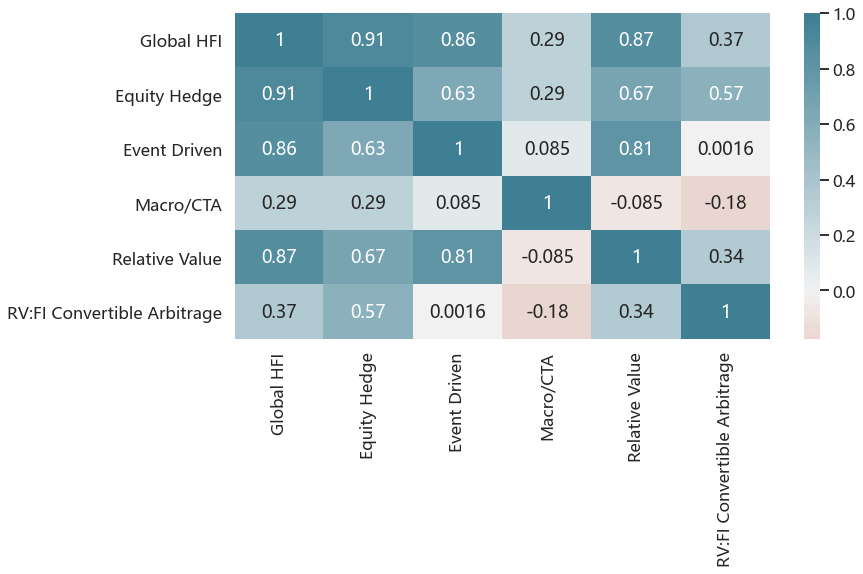

In [314]:
plt.figure(figsize=(12,6))
sns.heatmap(df_HFRX_price.corr(),cmap=sns.diverging_palette(20, 220, n=200), 
            annot=True, # 注入数据
            center = 0) # 绘制有色数据时将色彩映射居中的值)
plt.show()

##  Equity Indices

In [301]:
df_equity_return=df_all.iloc[:,7:-1]
df_equity_return

,SP,HS,Gree
date,,,
2003-04-01,0.012144,-0.004350,0.000000
2003-04-02,0.026116,0.012714,0.003341
2003-04-03,-0.005052,-0.006665,-0.012209
2003-04-04,0.002738,0.020153,0.002247
2003-04-07,0.001229,0.015841,0.001121
...,...,...,...
2021-07-14,0.001165,-0.006292,0.004049
2021-07-15,-0.003262,0.007515,-0.002016
2021-07-16,-0.007539,0.000300,0.009899


In [303]:
df_equity_return.corr()

,SP,HS,Gree
SP,1.000000,0.004176,0.037078
HS,0.004176,1.000000,0.048601
Gree,0.037078,0.048601,1.000000


In [308]:
df_equity_price=df_all_price.iloc[:,7:]
df_equity_price

,SP,HS,Gree
0,848.18,8634.45,8.98
1,858.48,8596.89,8.98
2,880.90,8706.19,9.01
3,876.45,8648.16,8.90
4,878.85,8822.45,8.92
...,...,...,...
4306,4374.30,27787.46,49.60
4307,4360.03,27996.27,49.50
4308,4327.16,28004.68,49.99
4309,4258.49,27489.78,51.48


In [309]:
df_equity_price.corr()

,SP,HS,Gree
SP,1.000000,0.748537,0.810837
HS,0.748537,1.000000,0.818348
Gree,0.810837,0.818348,1.000000
